# Setup

In [1]:
%load_ext autoreload
%autoreload 2

In [2]:
import scanpy as sc

import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
plt.rcParams['pdf.fonttype'] = 42
plt.rcParams['ps.fonttype'] = 42

# # show figures in the notebook
%matplotlib inline 


sc.settings.set_figure_params(dpi=200) # save umaps as non-vectorial hi-res images
# plt.rcParams['figure.figsize']=(10,10) # make figures square if not using the setting bellow
sc.set_figure_params(frameon=False)



In [3]:
import sys
sys.path.append('/data/angela/src/scVI_TSP/')
sys.path.append('/data/angela/sapiens/tabula-sapiens/')
# from utils.annotations_utils import *
from utils.colorDict import *
from utils.general_utils import *
from utils.plotting_utils import *

# Load the color dictionaries

In [4]:
donors_color_dict = donor_colors()
tissues_color_dict = tissue_colors()
methods_color_dict = method_colors()
compartments_color_dict = compartment_colors()
sex_color_dict = sex_colors()

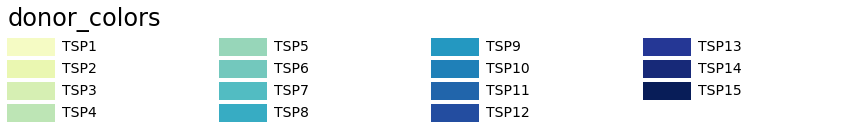

In [5]:
# display(donors_color_dict)
plot_colortable(donors_color_dict,'donor_colors',sort_colors=False)
plt.savefig("./figures/donor_color_dict.pdf")

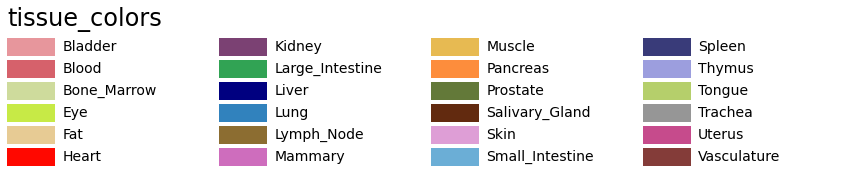

In [6]:
# display(tissues_color_dict)
plot_colortable(tissues_color_dict,'tissue_colors',sort_colors=False)
plt.savefig("./figures/tissue_color_dict.pdf")

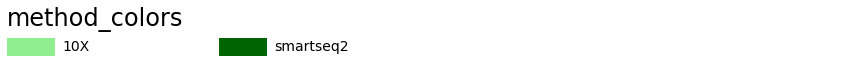

In [7]:
# display(methods_color_dict)
plot_colortable(methods_color_dict,'method_colors',sort_colors=False)
plt.savefig("./figures/method_color_dict.pdf")

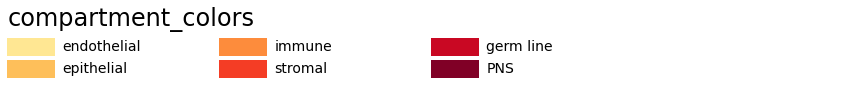

In [8]:
# display(compartments_color_dict)
plot_colortable(compartments_color_dict,'compartment_colors',sort_colors=False)
plt.savefig("./figures/compartment_color_dict.pdf")

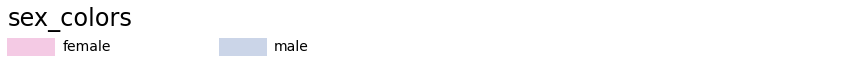

In [9]:
# display(sex_color_dict)
plot_colortable(sex_color_dict,'sex_colors',sort_colors=False)
plt.savefig("./figures/sex_color_dict.pdf")

# Load the data

In [10]:
data_path = "/mnt/ibm_lg/angela/sapiens/data/sapiens_paper1/"

In [11]:
adata = sc.read_h5ad(
    "/mnt/ibm_lg/angela/sapiens/data/TSP1_TSP15/TSP1_TSP15_scvi_donor-method_normalized-log1p-scaled_annotated_clean.h5ad"
)
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'cell_identifier', 'decontX_split', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred', 'knn_on_scanorama_pred', 'Annotation', '_labels_annotation', 'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id', 'onclass_pred', 'rf_pred', '_batch_annotation', 'knn_on_scvi_offline_pred', 'consensus_percentage', 'consensus_prediction', 'Manually Annotated', '_ref_subsample', 'score_epithelial', 'score_endothelial', 'score_stromal', 'score_immune', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment'
    var: 'gene_symbol', 'feature_type', '

# Figure 1

In [12]:
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'cell_identifier', 'decontX_split', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred', 'knn_on_scanorama_pred', 'Annotation', '_labels_annotation', 'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id', 'onclass_pred', 'rf_pred', '_batch_annotation', 'knn_on_scvi_offline_pred', 'consensus_percentage', 'consensus_prediction', 'Manually Annotated', '_ref_subsample', 'score_epithelial', 'score_endothelial', 'score_stromal', 'score_immune', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment'
    var: 'gene_symbol', 'feature_type', '

In [13]:
adata.obs['sex'] = 'female'

adata.obs.loc[
    adata.obs[
        adata.obs['donor'].isin(['TSP6','TSP8','TSP9','TSP10','TSP11','TSP12','TSP13','TSP14','TSP15'])].index,'sex'] = 'male'



In [ ]:
adata.uns['donor_colors'] = list(donors_color_dict.values())
adata.uns['method_colors'] = list(methods_color_dict.values())
adata.uns['compartment_colors'] = list(compartments_color_dict.values())
adata.uns['tissue_colors'] = list(tissues_color_dict.values())
adata.uns['sex_colors'] = list(sex_color_dict.values())

In [30]:
adata.obs.loc[adata.obs["cell_ontology_class"]=="hillock-club cell of prostate epithelium","compartment"] = "epithelial"

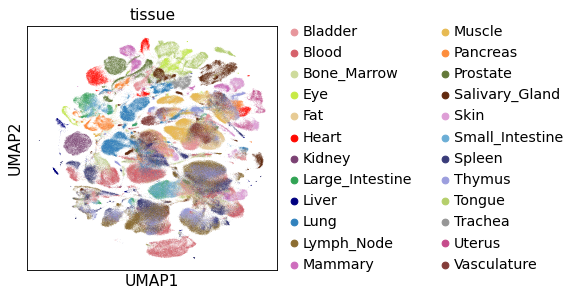

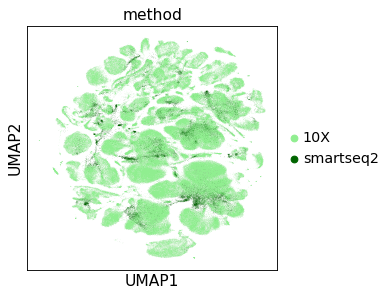

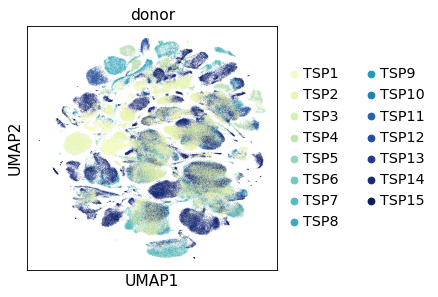

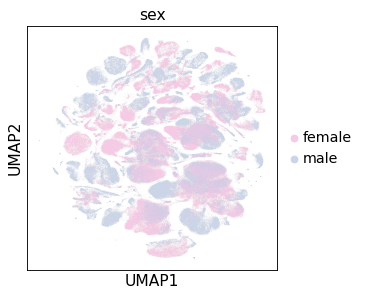

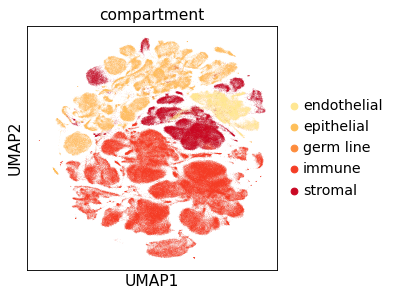

In [31]:
colorbylist = ['tissue','method','donor','sex','compartment']
for c in colorbylist:
    sc.pl.umap(adata,
           color=c,
               frameon = True,
           save = "_global_"+c+".pdf"
          )

In [32]:
set(adata.obs["compartment"])

{'endothelial', 'epithelial', 'germ line', 'immune', 'stromal'}

In [33]:
set(adata[adata.obs["compartment"].isna()].obs["cell_ontology_class"])

set()

In [16]:
pwd

'/data/angela/sapiens/tabula-sapiens/analysis-scripts/publication/v0'

## pre-processing steps

In [ ]:
# adata = sc.read_h5ad(data_path + "Pilot1_Pilot2.Final.h5ad")
# adata = remove_cats(adata)
# adata

In [ ]:
# adata = sc.read_h5ad(
#     "/mnt/ibm_lg/angela/sapiens/data/Pilot1_Pilot2_filtered_ensembl_id_Aug5.ss2_norm.ann.compartment.allgenes.h5ad")
# adata

In [ ]:
adata = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/data/Pilot1_Pilot2_decontX_Oct2020.h5ad")
adata = remove_cats(adata)
adata

In [ ]:
df = adata.obs.groupby(['tissue'])['Propagated.Annotationcollapsed'].agg([len,set])
df['setlen'] = [len(list(s)) for s in df['set']]
df = df[['setlen']]
df

Make sure the colors are set correctly

In [ ]:
adata.uns['donor_colors'] = list(donors_color_dict.values())
adata.uns['method_colors'] = list(methods_color_dict.values())
adata.uns['compartment_oct2020_colors'] = list(compartments_color_dict.values())
adata.uns['compartment_colors'] = list(compartments_color_dict.values())
adata.uns['tissue_colors'] = list(tissues_color_dict.values())

In [ ]:
colorbylist = ['tissue','method','donor','annotation_oct2020','compartment_oct2020']
for c in colorbylist:
    sc.pl.umap(adata,
           color=c,
#            save = "_global_"+c+".pdf"
          )

In [ ]:
adata.obs['compartment'] = adata.obs['compartment_oct2020']
adata.obs['cell_ontology_type'] = adata.obs['annotation_oct2020']


In [ ]:
adata.uns['compartment_colors'] = ["#f26a22","#2DB34A","#C04097","#4A92CE","#4A92CE"]
sc.pl.umap(adata, color='compartment', save = "_fig2_review.pdf")

In [ ]:
colorbylist = ['tissue','method','donor','cell_ontology_type','compartment']
for c in colorbylist:
    sc.pl.umap(adata,
           color=c,
#            save = "_global_"+c+".pdf"
          )

In [ ]:
adata

In [ ]:
adata = remove_cats(adata)

In [ ]:
adata.obs.groupby(['donor','tissue']).count()

In [ ]:
adata.write(data_path + "Pilot1_Pilot2_decontX_Oct2020.h5ad")

In [ ]:
data_path

In [ ]:
adata.obs

# Look at `n_genes` and `n_counts` across the dataset 

In [19]:
adata = remove_cats(adata)
metadata = adata.obs.copy()

In [20]:
sc.pp.calculate_qc_metrics(adata, inplace=True)

In [24]:
metadata["cellId"] = metadata.index

In [25]:
pd.DataFrame(metadata.groupby(['donor','tissue','method','computational_compartment_assignment'])['cellId'].count())

cellId
donor tissue   method    computational_compartment_assignment        
TSP1  Bladder  10X       endothelial                             1414
                         epithelial                              2159
                         immune                                  2692
                         stromal                                 4630
                         undetermined                             127
...                                                               ...
TSP9  Pancreas smartseq2 endothelial                                2
                         epithelial                                71
                         immune                                    17
                         stromal                                    4
                         undetermined                               7

[467 rows x 1 columns]

In [ ]:
tissues_color_dict.keys()

In [ ]:
list(donors_color_dict.keys())

In [26]:
set(metadata.method)

{'10X', 'smartseq2'}

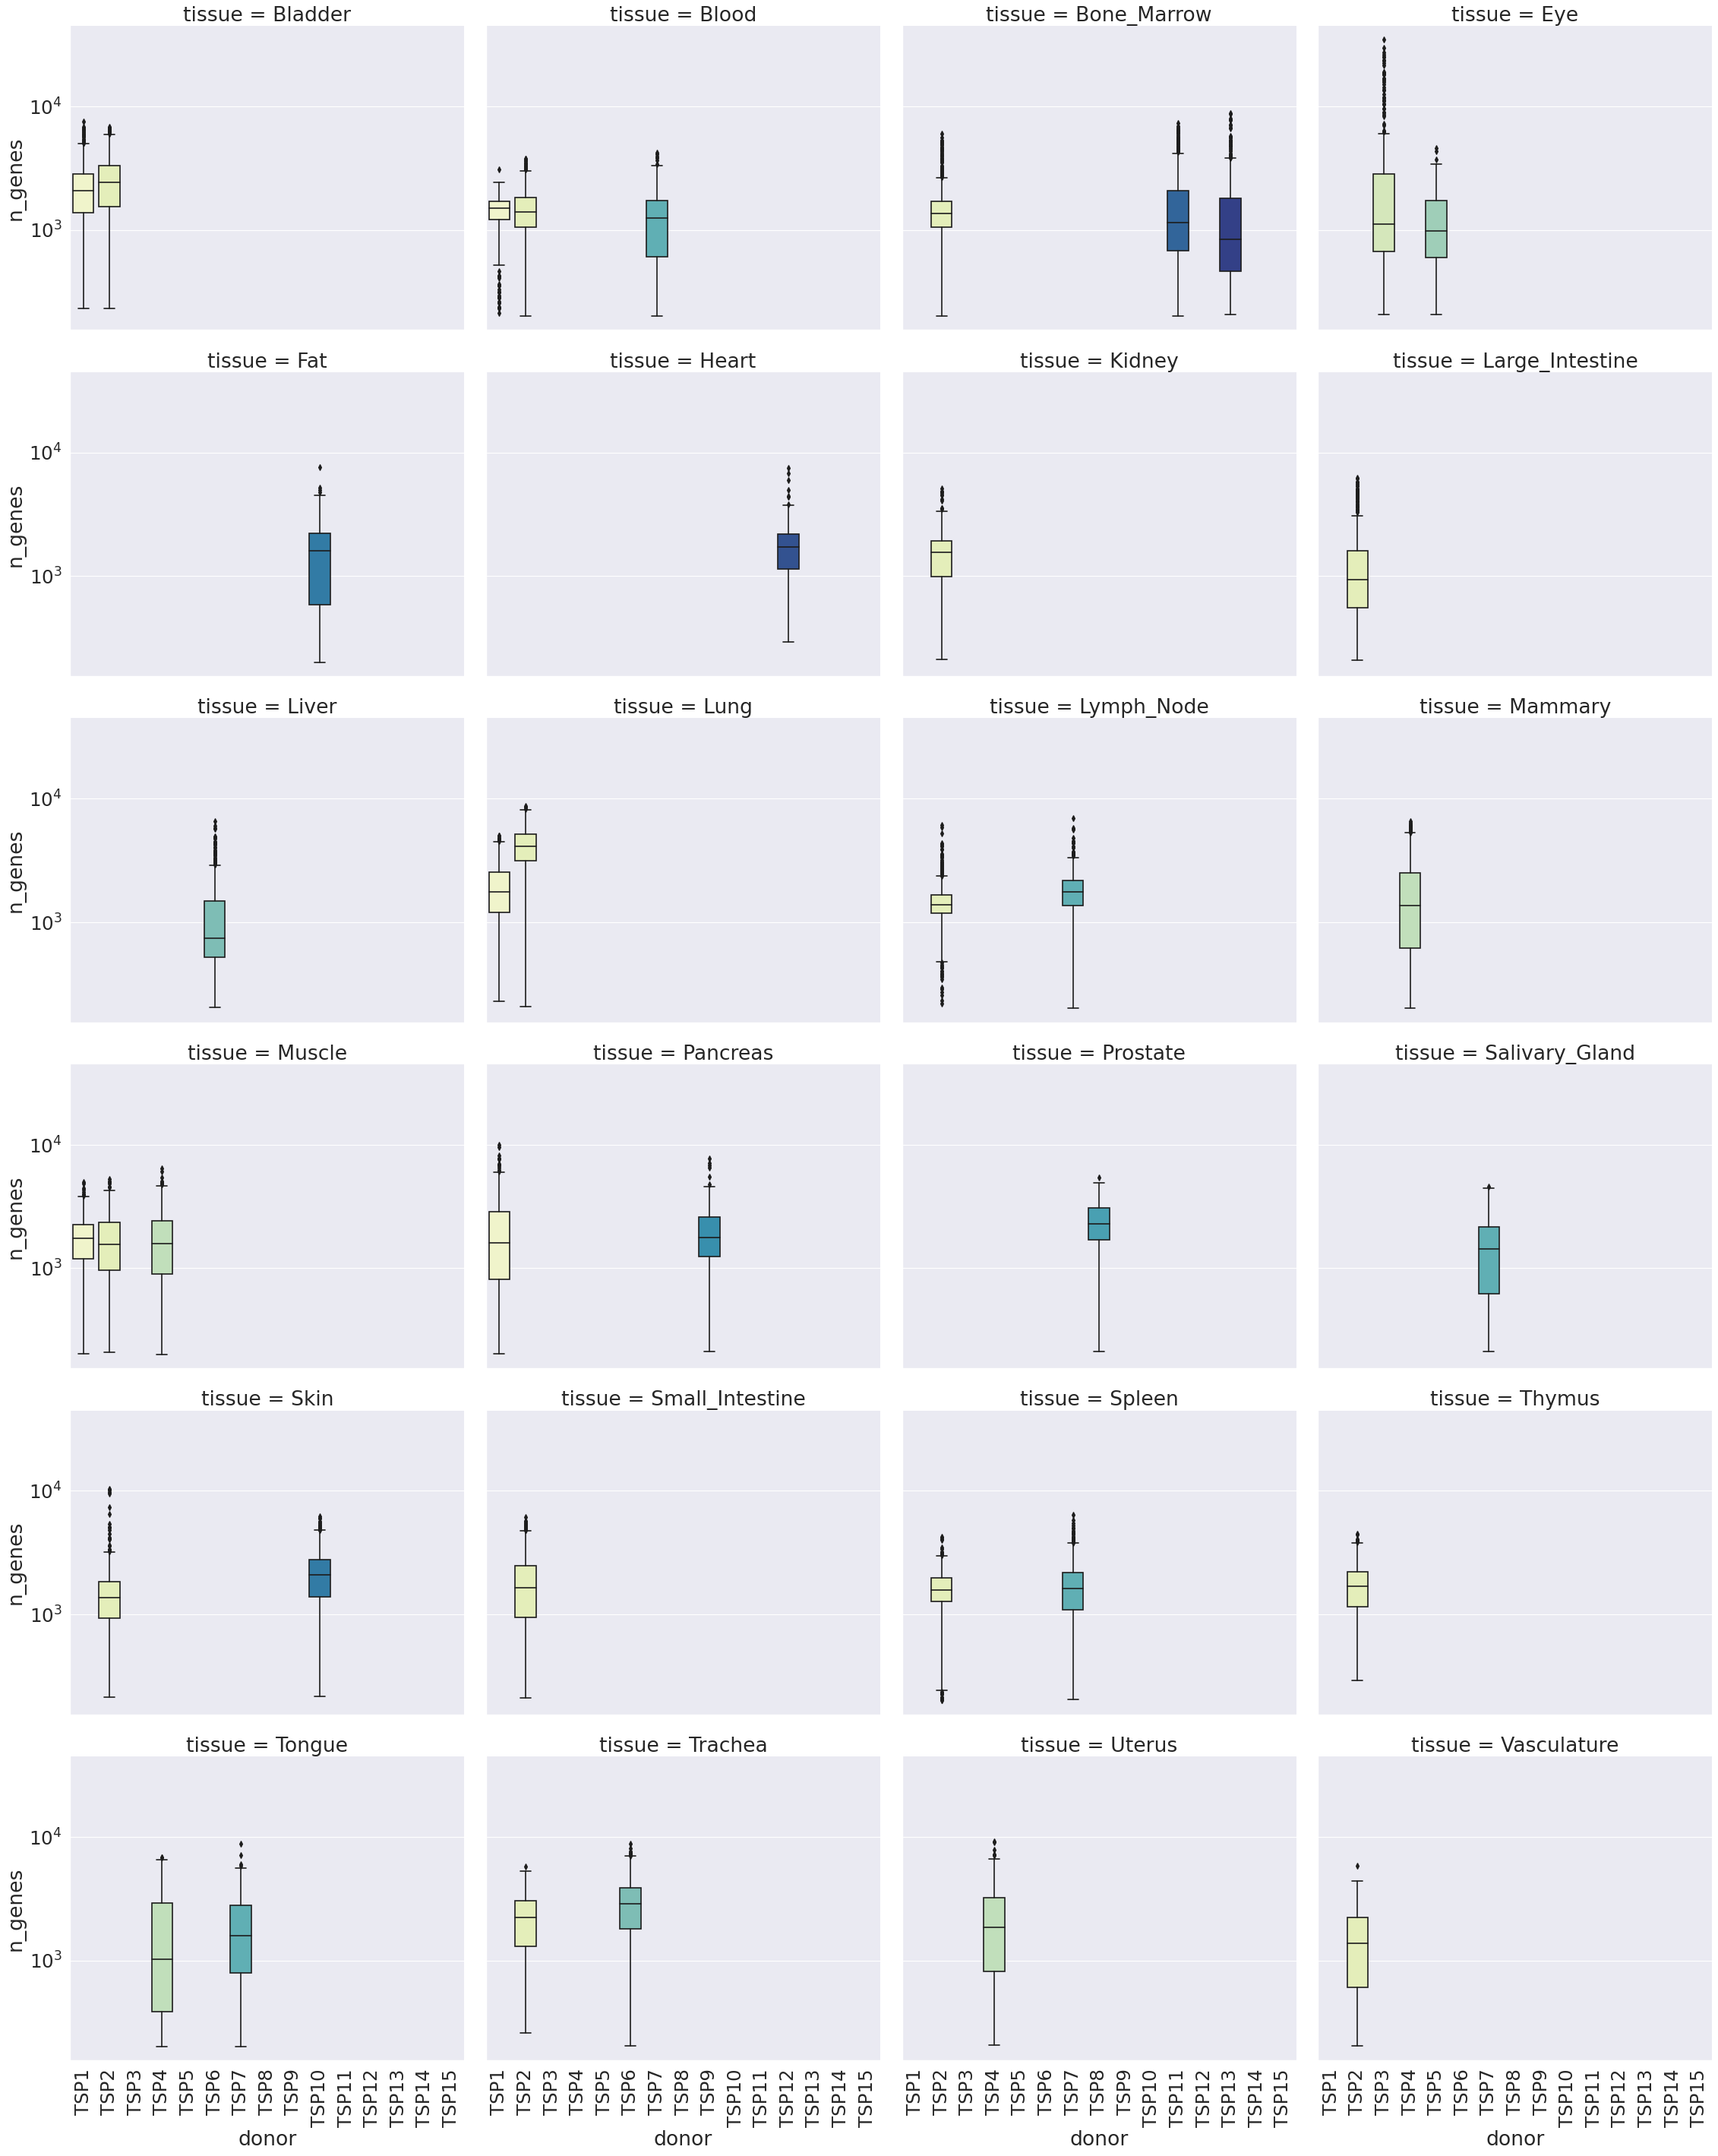

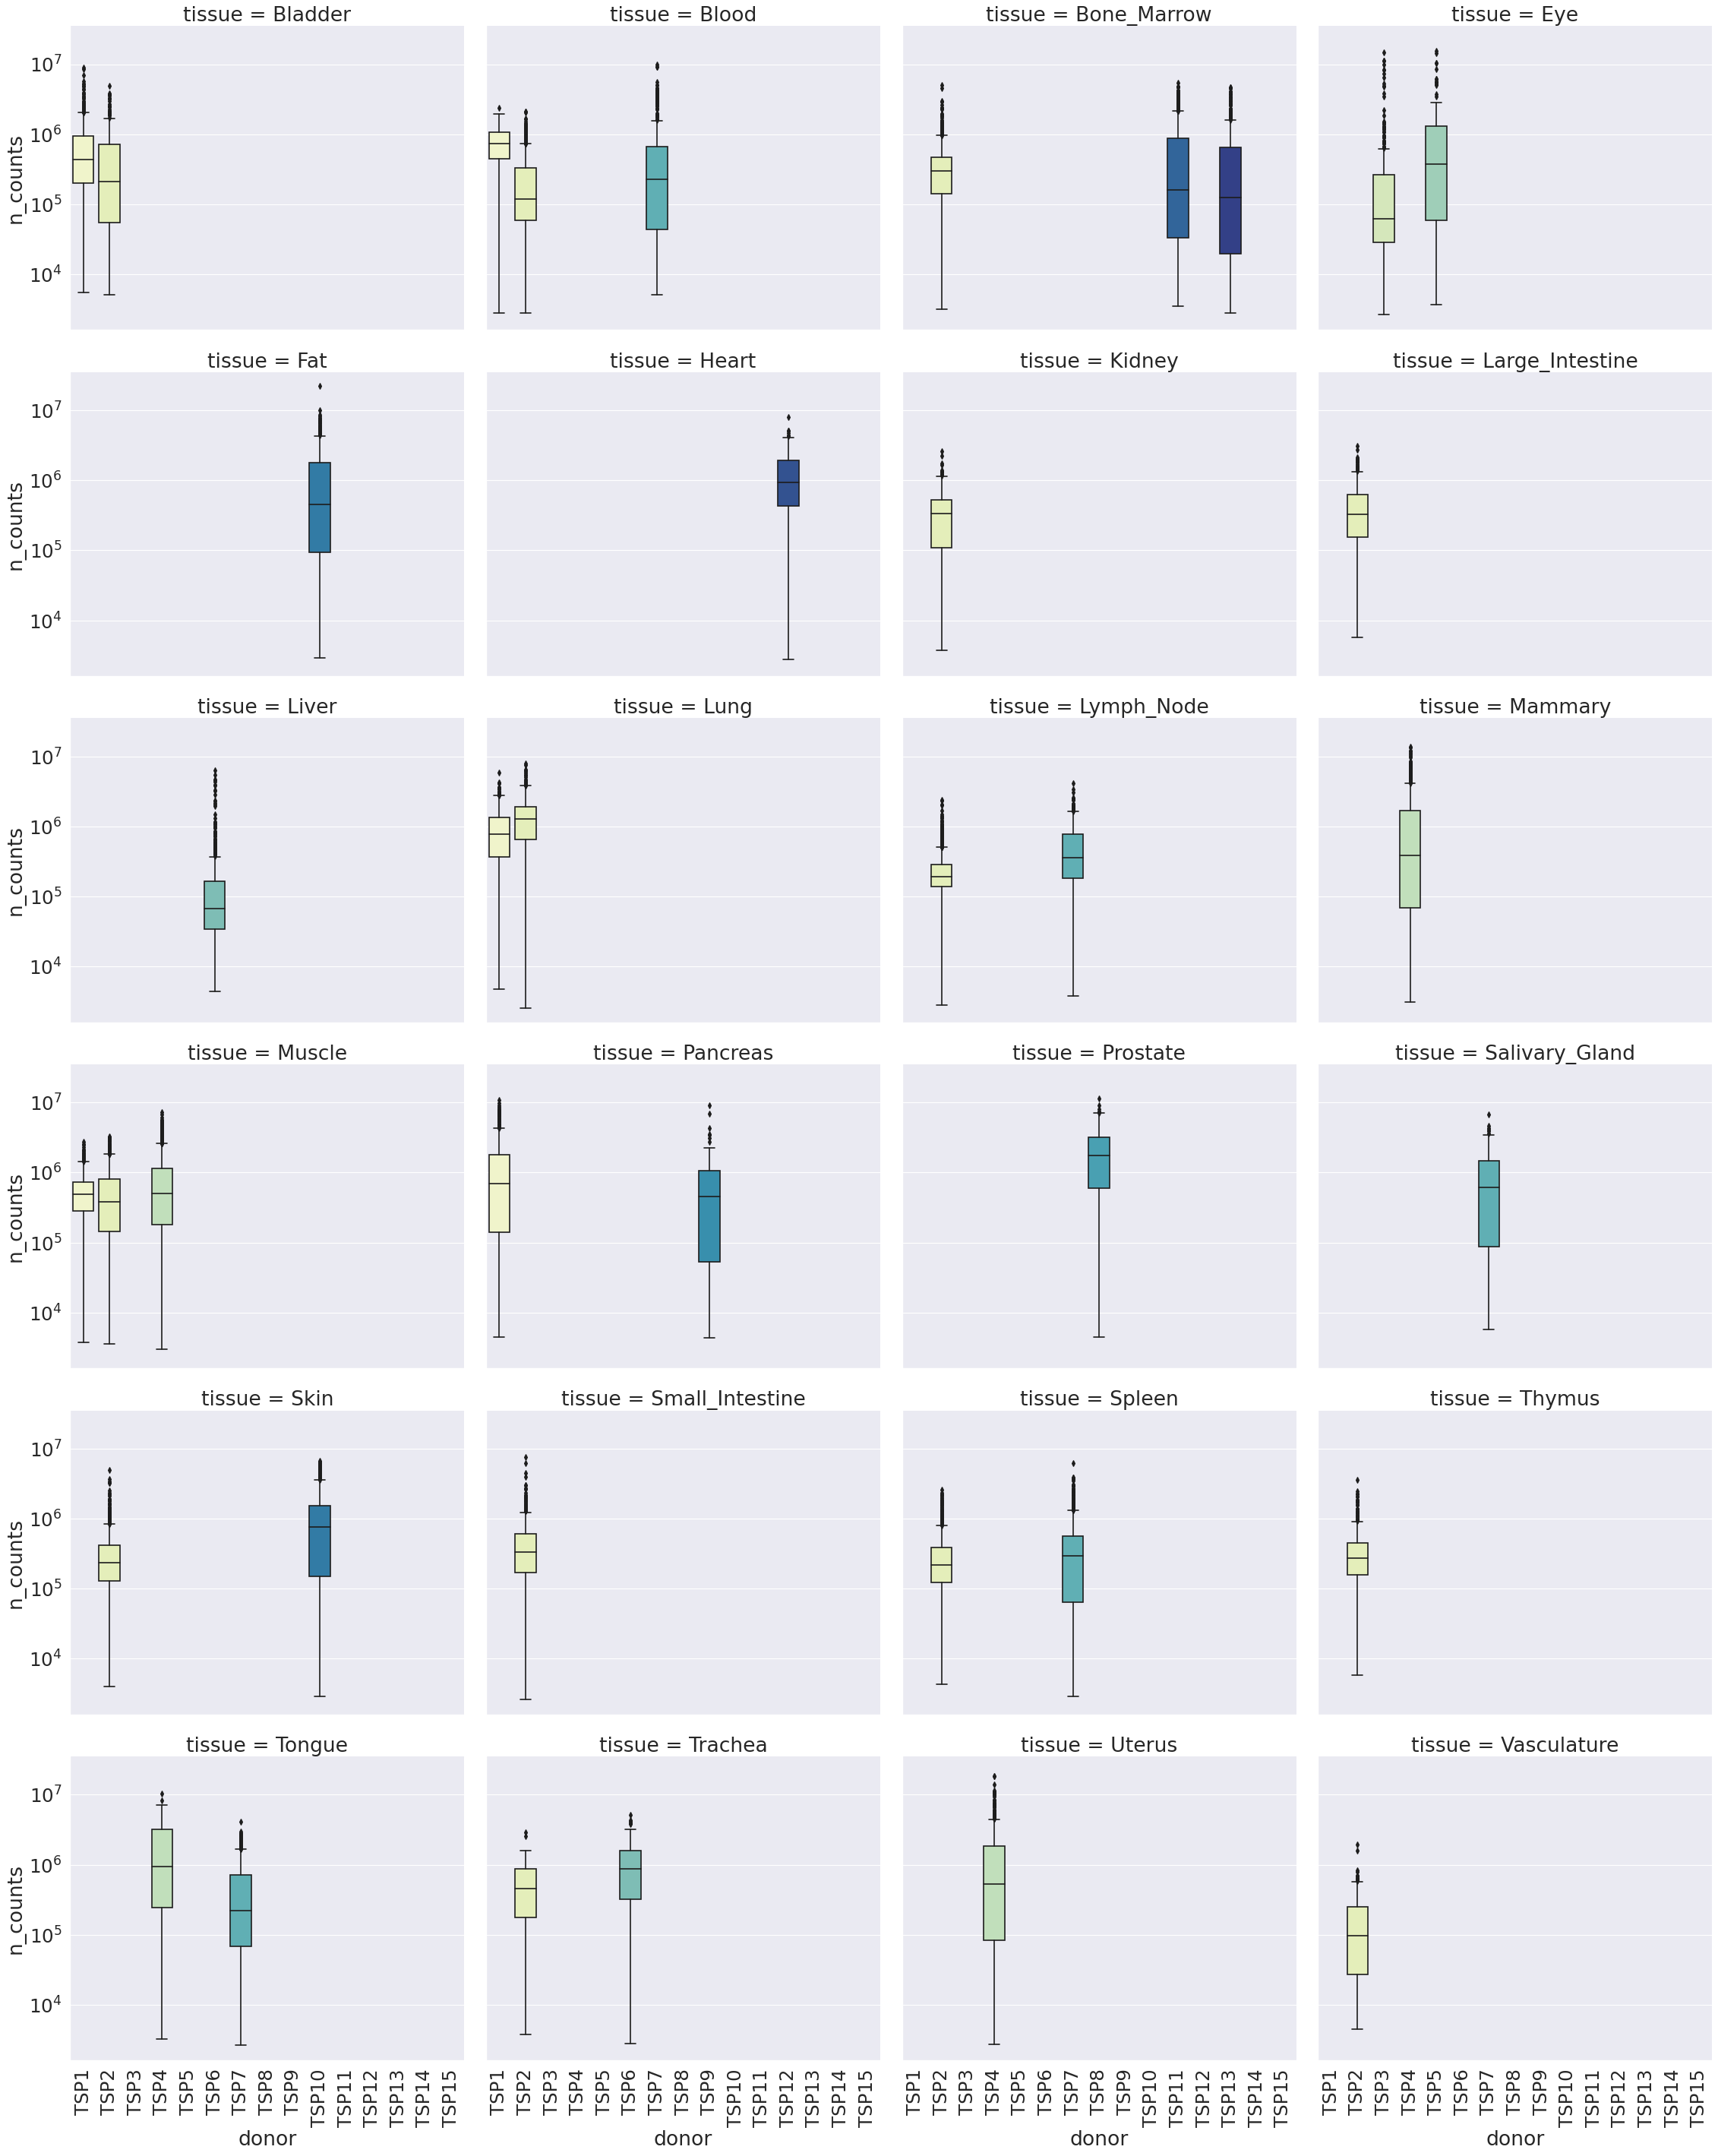

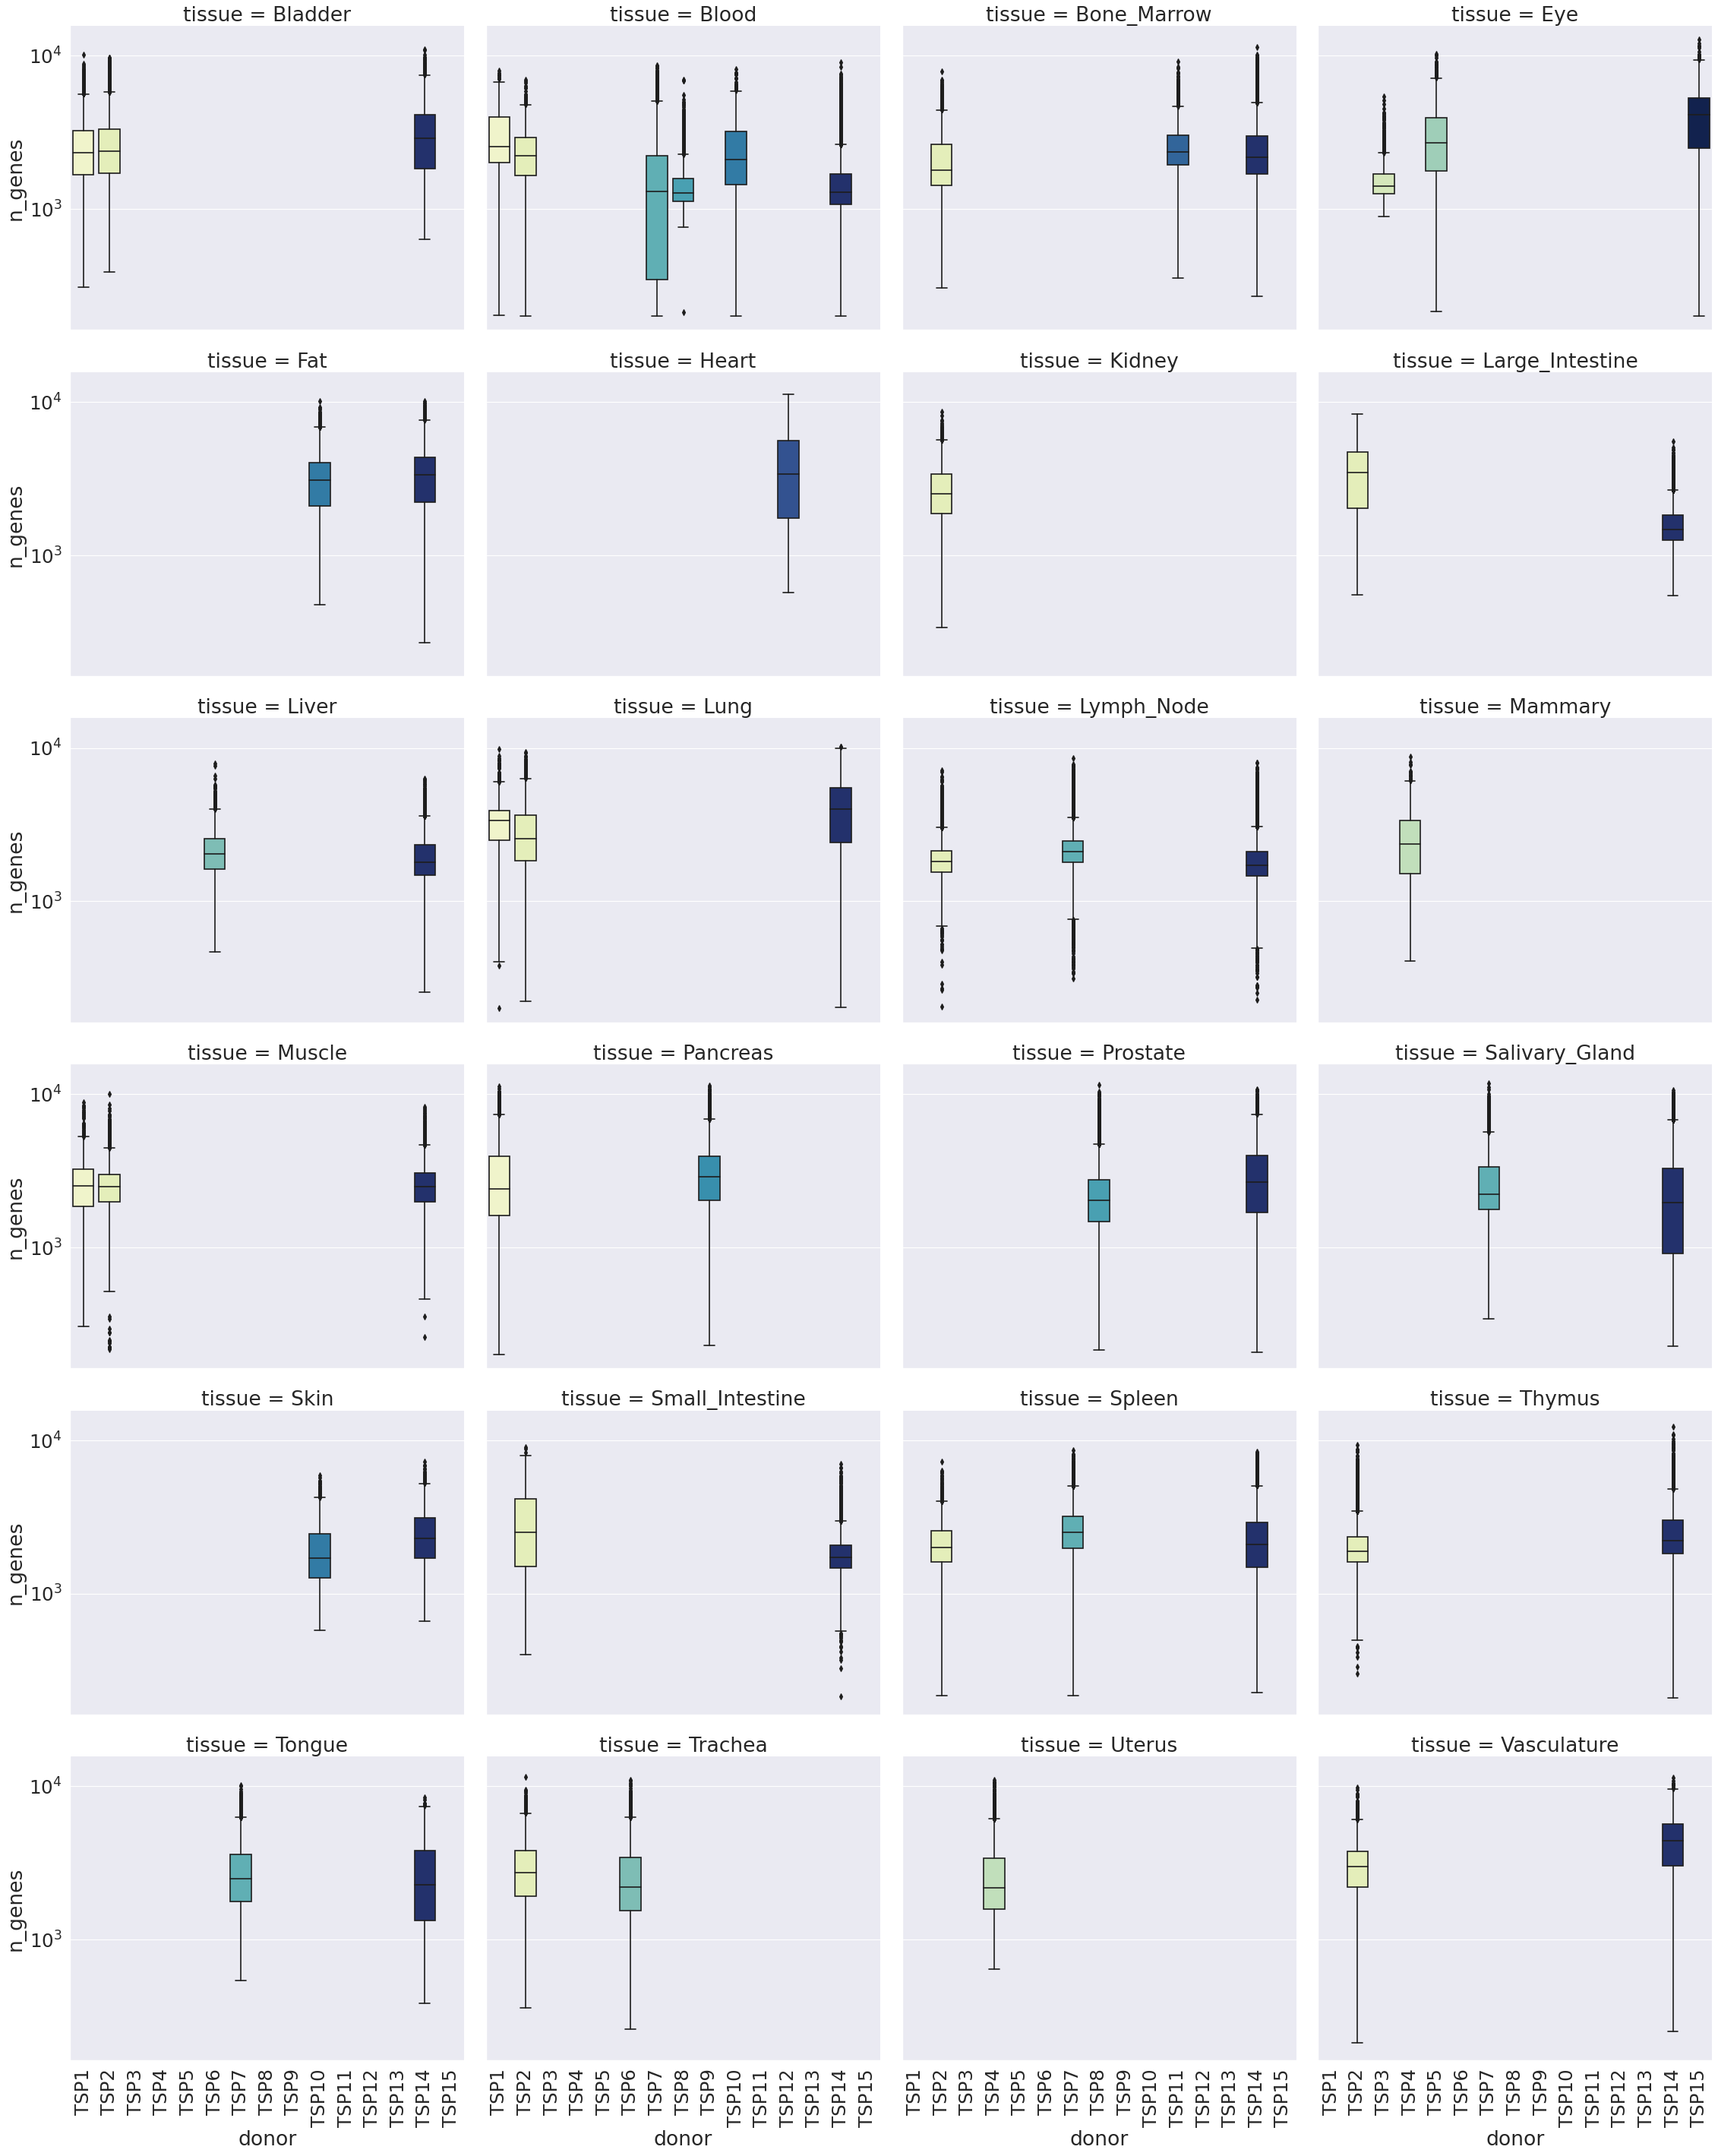

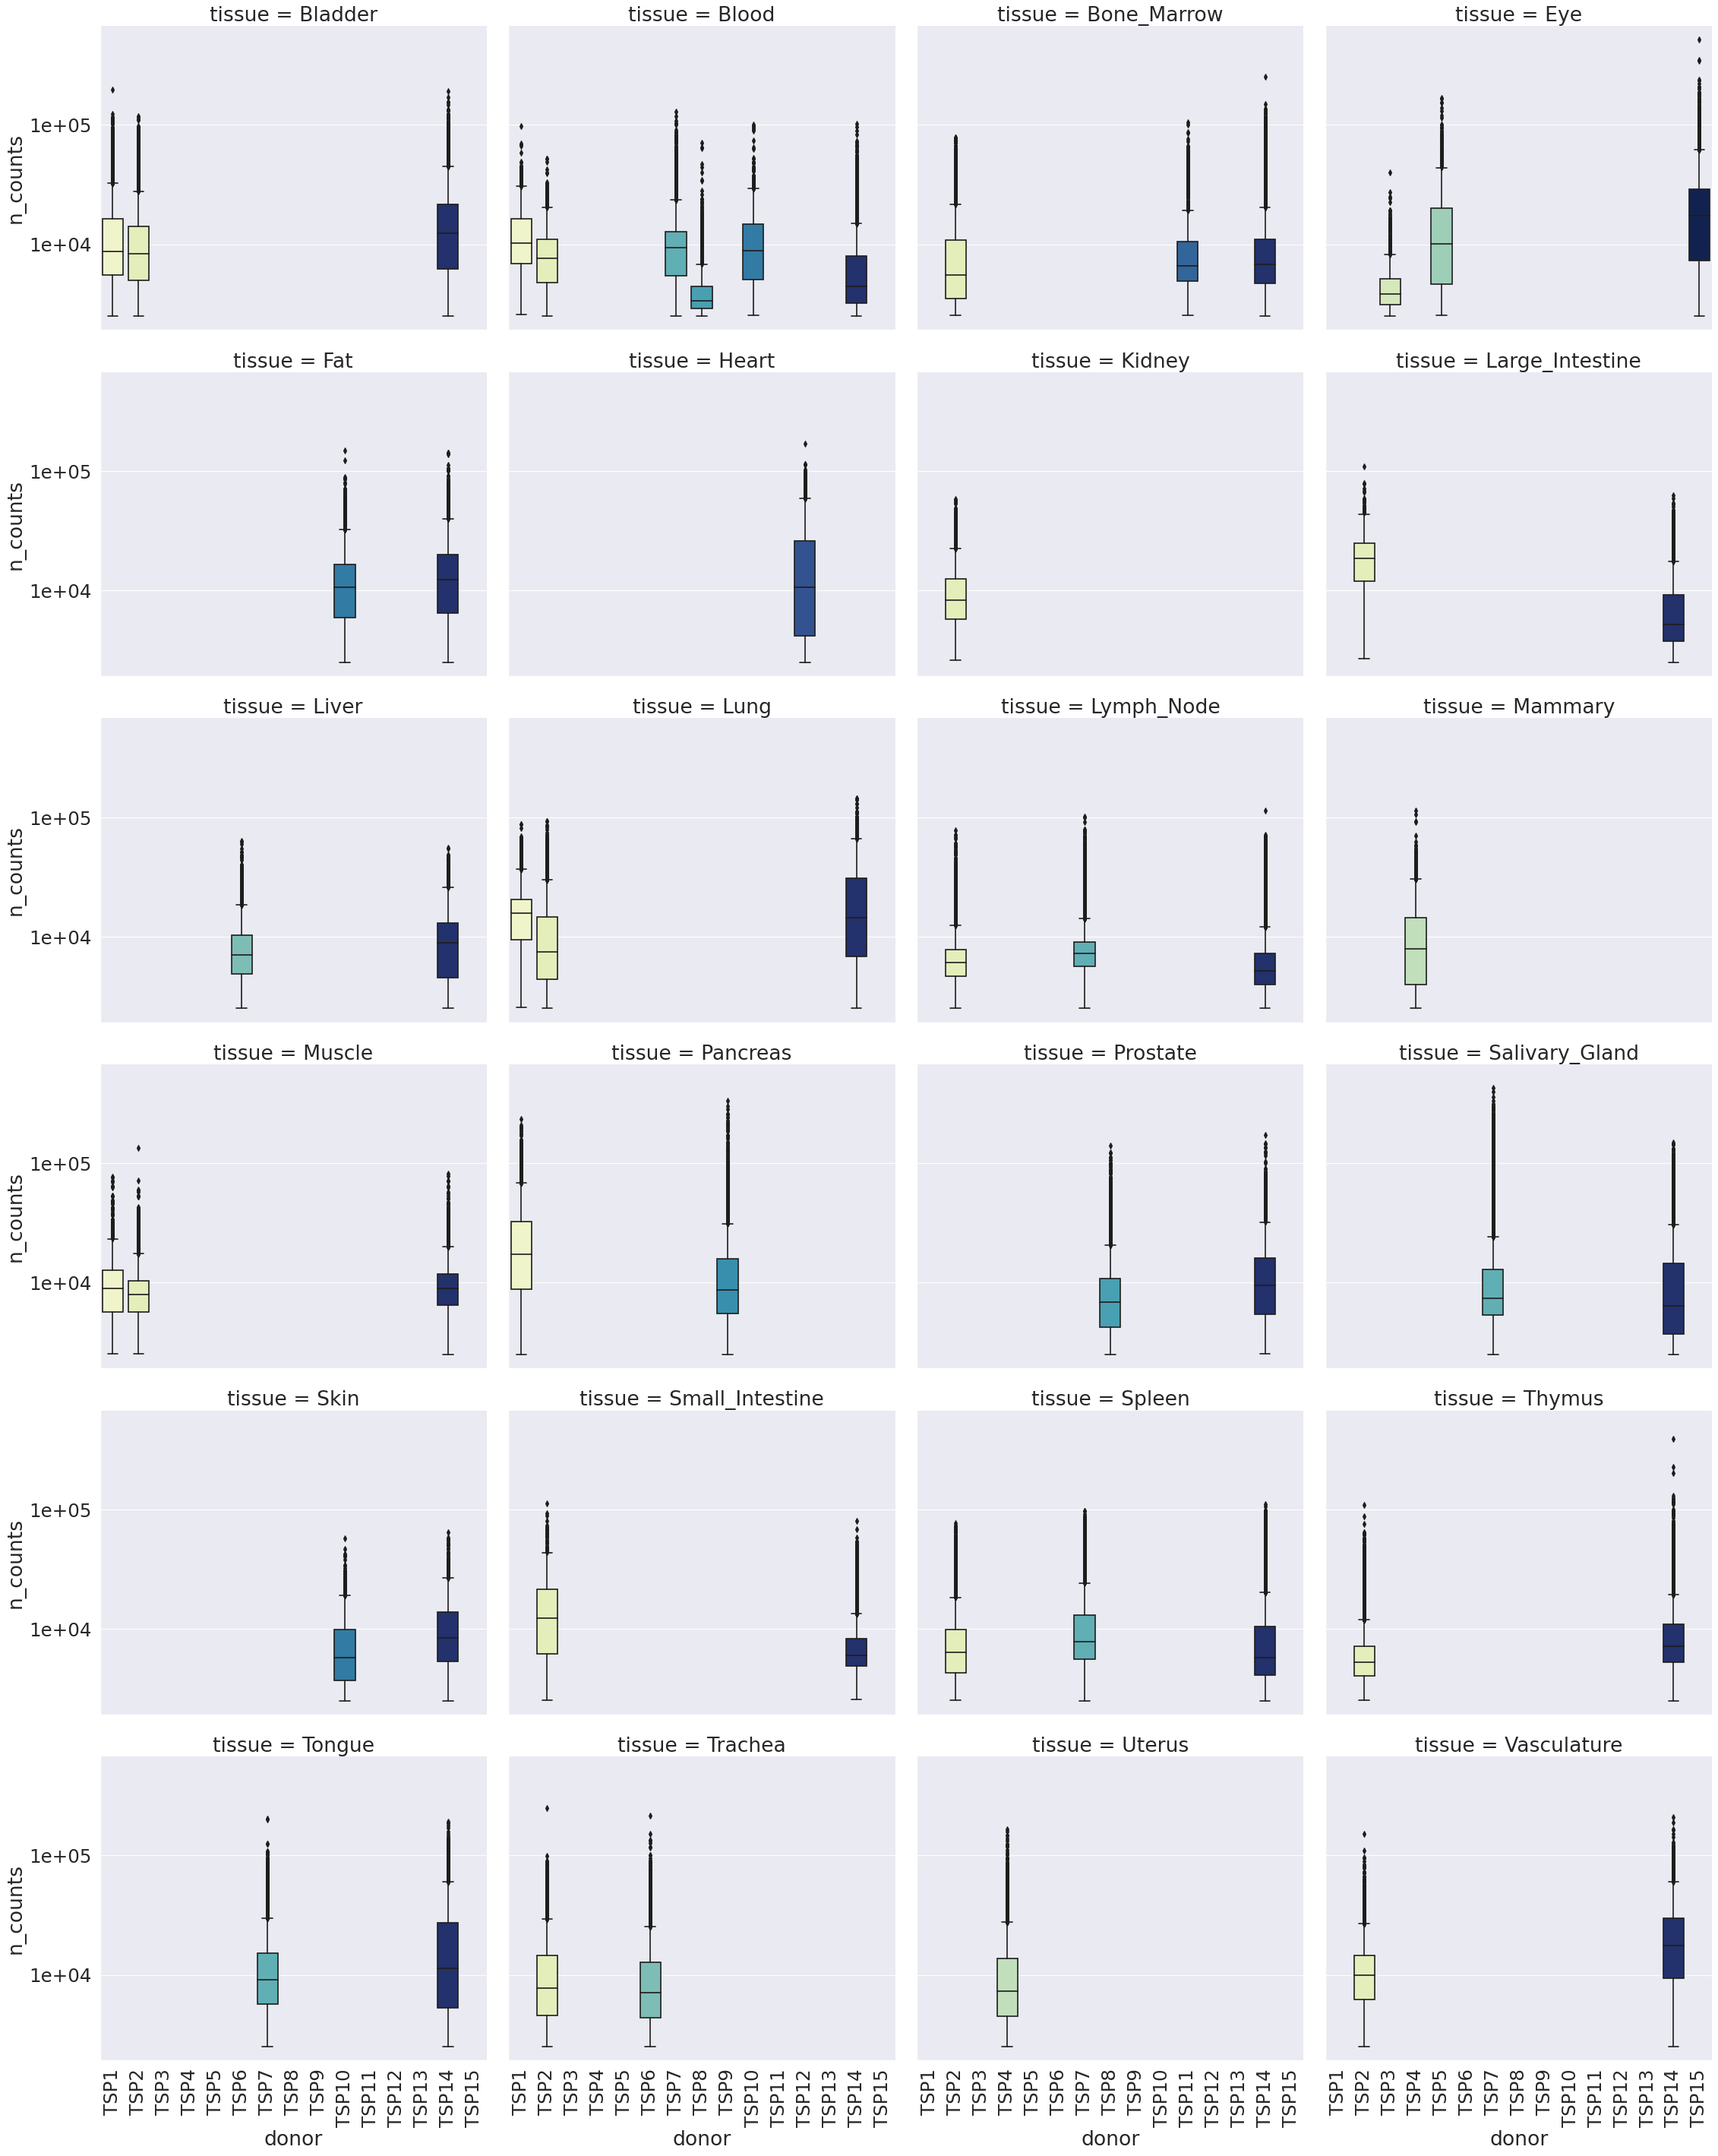

In [33]:
import matplotlib.ticker as tkr
sns.set(font_scale=2) 

tissue_order = list(tissues_color_dict.keys())
# f, ax = plt.subplots() 
g = sns.FacetGrid(
    metadata[metadata['method']=='smartseq2'], 
    col="tissue", col_wrap=4, height=6, aspect=1.2, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_genes",order=list(donors_color_dict.keys()), palette=donors_color_dict).set(yscale = 'log')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("figures/ts_smartseq2_ngenes.pdf")

g = sns.FacetGrid(
    metadata[metadata['method']=='smartseq2'], 
    col="tissue", col_wrap=4, height=6, aspect=1.2, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_counts",order=list(donors_color_dict.keys()), palette=donors_color_dict).set(yscale = 'log')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("figures/ts_smartseq2_ncounts.pdf")

g = sns.FacetGrid(
    metadata[metadata['method']=='10X'], 
    col="tissue", col_wrap=4, height=6, aspect=1.2, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_genes",order=list(donors_color_dict.keys()), palette=donors_color_dict).set(yscale = 'log')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
plt.tight_layout()
plt.savefig("figures/ts_10X_ngenes.pdf")

g = sns.FacetGrid(
    metadata[metadata['method']=='10X'], 
    col="tissue", col_wrap=4, height=6, aspect=1.2, 
    col_order=tissue_order)#, ylim=(0, 10))
g.map(sns.boxplot, "donor", "n_counts",order=list(donors_color_dict.keys()), palette=donors_color_dict).set(yscale = 'log')
for ax in g.axes.ravel():
    ax.set_xticklabels(ax.get_xticklabels(), rotation=90)
ax = plt.gca()
ax.yaxis.set_major_formatter(tkr.FuncFormatter(lambda x, p: "{:.0e}".format(x)))
plt.tight_layout()
plt.savefig("figures/ts_10X_ncounts.pdf")


# Sankey diagram for compartment cell type

In [1]:
pwd

'/data/angela/sapiens/tabula-sapiens/analysis-scripts/publication/v0'

In [141]:
import plotly
import chart_studio.plotly as py
# import plotly.graph_objs as go
from plotly.offline import download_plotlyjs, init_notebook_mode, plot, iplot
init_notebook_mode(connected=True)

In [142]:
adata.obs.columns

Index(['10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample',
       '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position',
       '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method',
       'cell_identifier', 'decontX_split', 'n_counts', 'n_genes',
       '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean',
       '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred',
       'knn_on_scanorama_pred', 'Annotation', '_labels_annotation',
       'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id',
       'onclass_pred', 'rf_pred', '_batch_annotation',
       'knn_on_scvi_offline_pred', 'consensus_percentage',
       'consensus_prediction', 'Manually Annotated', '_ref_subsample',
       'score_epithelial', 'score_endothelial', 'score_stromal',
       'score_immune', 'computational_compartment_assignment',
       'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class',
       'free_annotation', 'manually_annotated', 'compartmen

In [143]:
set(adata.obs['compartment'])

{'endothelial', 'epithelial', 'germ line', 'immune', 'stromal'}

In [145]:
# adata = sc.read_h5ad(
#     "/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/TSP1_TSP2.annotated.public_facing.h5ad")
adata = remove_cats(adata)
df = adata.obs.groupby(['tissue','cell_ontology_class','compartment'])['donor'].count().reset_index()

for comp in ['endothelial','immune','epithelial','stromal','germ line','all']:
    if comp == 'all':
        fig = genSankey(df,
                        cat_cols=['tissue','cell_ontology_class','compartment'],
                        cat_cols_color = [tissues_color_dict,'#00A1E0',compartments_color_dict],
                        value_cols='donor',
                        title='tissue_cell_type')
        iplot(fig, validate=False)
        plotly.offline.plot(fig, validate=False, filename="figures/sankey_"+comp+".html")#, output_type='div')
    
    else:
        fig = genSankey(df[df['compartment']==comp],
                        cat_cols=['tissue','cell_ontology_class'],
                        cat_cols_color = [tissues_color_dict,compartments_color_dict[comp]],
                        value_cols='donor',
                        title=comp)
        iplot(fig, validate=False)
        plotly.offline.plot(fig, validate=False, filename="figures/sankey_"+comp+".html")#, output_type='div')
        

In [ ]:
adata

In [ ]:
set(adata.obs['Organ'])

In [ ]:
[tissues_color_dict.get(key) for key in set(adata.obs['Organ'])]

In [ ]:
tissues = list(set(adata.obs['Organ']))
tissues.sort()
tissues

In [ ]:
# [tissues_color_dict.get(key) for key in set(adata.obs['Organ'])]
# [print(key) for key in set(adata.obs['Organ'])]

In [ ]:
# for comp in ['Endothelial','Immune','Epithelial','Stromal','all']:
#     if comp == 'all':
#         adata = sc.read_h5ad(
#             "/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/TabulaSapiens.h5ad"
#         )
#         adata.uns['Organ_colors'] = list(tissues_color_dict.values())
#         sc.pl.umap(adata, color=["Organ"], save = "_"+comp+".png")
#     else:
#         adata = sc.read_h5ad(
#             "/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/TS_"+comp+".h5ad"
#         )
#         tissues = list(set(adata.obs['Organ']))
#         tissues.sort()
#         adata.uns['Organ_colors'] = [tissues_color_dict.get(key) for key in tissues]
#         adata = remove_cats(adata)
#         sc.pl.umap(adata, color=["Organ"], save = "_"+comp+".png")

In [ ]:
import os 
tissues = os.listdir("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3")
tissues.sort()
tissues

In [ ]:
adata

In [ ]:
for t in tissues:
    print(t)
    adata = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/"+t)
    tiss_list = list(set(adata.obs['Organ']))
    tiss_list.sort()
    adata.uns['Organ_colors'] = [tissues_color_dict.get(key) for key in tiss_list]
    comp_list = list(set(adata.obs['Compartment']))
    comp_list.sort()
    adata.uns['Compartment_colors'] = [compartments_color_dict.get(key) for key in comp_list]
    method_list = list(set(adata.obs['Method']))
    method_list.sort()
    adata.uns['Method_colors'] = [methods_color_dict.get(key) for key in method_list]
    donor_list = list(set(adata.obs['Donor']))
    donor_list.sort()
    adata.uns['Donor_colors'] = [donors_color_dict.get(key) for key in donor_list]
    sc.pl.umap(adata, color=["Organ","Compartment","Method","Donor"])#
    adata.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/"+t)
    

In [ ]:
for t in tissues:
    print(t)
    adata = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/"+t)
#     tiss_list = list(set(adata.obs['Organ']))
#     tiss_list.sort()
#     adata.uns['Organ_colors'] = [tissues_color_dict.get(key) for key in tiss_list]
#     comp_list = list(set(adata.obs['Compartment']))
#     comp_list.sort()
#     adata.uns['Compartment_colors'] = [compartments_color_dict.get(key) for key in comp_list]
    sc.pl.umap(adata, color=["Organ","Compartment"])#
#     adata.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/"+t)
    

In [ ]:
metadata.columns

In [ ]:
set(adata.obs['tissue'])

In [ ]:
metadata.groupby(
    ['compartment','cell_ontology_type']
).count()

In [ ]:
df = metadata.groupby(#,'manual_cell_ontology_class'
    ['tissue','cell_ontology_type','compartment']).agg({'cell_id':len}).reset_index()
display(df.shape)
# df = df[df['cell_id']>10]
display(df.shape)

In [ ]:
pwd

In [ ]:
for comp in ['Endothelial','Immune','Epithelial','Stromal','PNS','all']:
    if comp == 'all':
        fig = genSankey(df,
                        cat_cols=['tissue','cell_ontology_type','compartment'],
                        cat_cols_color = [tissues_color_dict,'#00A1E0',compartments_color_dict],
                        value_cols='cell_id',
                        title='tissue_cell_type')
        iplot(fig, validate=False)
        plotly.offline.plot(fig, validate=False, filename="figures/sankey_"+comp+".html")#, output_type='div')
    else:
        fig = genSankey(df[df['compartment']==comp],
                        cat_cols=['tissue','cell_ontology_type'],
                        cat_cols_color = [tissues_color_dict,compartments_color_dict[comp]],
                        value_cols='cell_id',
                        title=comp)
        iplot(fig, validate=False)
        plotly.offline.plot(fig, validate=False, filename="figures/sankey_"+comp+".html")#, output_type='div')

# Write to table to make ballon plot in R

In [36]:
set(metadata["computational_compartment_assignment"])

{'endothelial', 'epithelial', 'immune', 'stromal', 'undetermined'}

In [37]:
df

tissue donor computational_compartment_assignment  trickR  cellId
0        Bladder  TSP1                          endothelial  Tissue    1597
1        Bladder  TSP1                           epithelial  Tissue    2336
2        Bladder  TSP1                               immune  Tissue    2827
3        Bladder  TSP1                              stromal  Tissue    4821
4        Bladder  TSP1                         undetermined  Tissue     155
..           ...   ...                                  ...     ...     ...
289  Vasculature  TSP2                          endothelial  Tissue    2720
290  Vasculature  TSP2                           epithelial  Tissue     173
291  Vasculature  TSP2                               immune  Tissue     948
292  Vasculature  TSP2                              stromal  Tissue    4770
293  Vasculature  TSP2                         undetermined  Tissue      69

[294 rows x 5 columns]

In [43]:
# adata = remove_cats(adata)
metadata['trickR'] = 'Tissue'
metadata['donor_numeric'] = [int(d.split("SP")[1]) for d in metadata['donor']]
df = pd.DataFrame(metadata.groupby(
    ['tissue','method','donor_numeric','computational_compartment_assignment','trickR'])['cellId'].count()).reset_index()
df.to_csv("sapiens_metadata_ballon_full_plot.csv")



df = pd.DataFrame(metadata.groupby(
    ['tissue','method','computational_compartment_assignment','trickR'])['cellId'].count()).reset_index()
df.to_csv("sapiens_metadata_ballon_plot.csv")


In [ ]:
pd.DataFrame(metadata.groupby(
    ['tissue'])['cellId'].count()).transpose().to_csv("tissue_counts.csv")

In [ ]:
pwd

# Summary statistics

In [ ]:
adata.obs.columns

In [ ]:
print('all',len(set(adata.obs['cell_ontology_type'])))
for c in set(adata.obs['compartment']):
    comp = adata.obs[adata.obs['compartment']==c]
    print(c,len(set(comp['cell_ontology_type'])))
for t in set(adata.obs['tissue']):
    tiss = adata.obs[adata.obs['tissue']==t]
    
    print(t,len(set(tiss['cell_ontology_type'])))

In [ ]:
pwd

In [35]:
# Create a Pandas Excel writer using XlsxWriter as the engine.
writer = pd.ExcelWriter('SuppTab2_DatasetSummaryStats.xlsx', engine='xlsxwriter')

# number cells per tissue and compartment and cell type and donor and method.
adata = remove_cats(adata)
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","compartment","cell_ontology_class","method","donor"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='all')

# number cells per tissue and compartment and cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","compartment","cell_ontology_class"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue_compartment_cell-type')

# number cells per tissue and donor and cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","cell_ontology_class","donor"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue_donor_cell-type')

# number cells per tissue per cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue","cell_ontology_class"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue_cell-type')

# number cells per tissue.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["tissue"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='tissue')

# number cells per donor.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["donor"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='donor')

# number cells per compartment.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["compartment"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='compartment')

# number cells per cell type.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["cell_ontology_class"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='cell_type')

# number cells per cell type and free annotations.
df = adata.obs.copy()
df = pd.DataFrame(df.groupby(["cell_ontology_class","free_annotation"])["cell_identifier"].count())
df = df.rename(columns={"cell_identifier":"number of cells"})
df.to_excel(writer, sheet_name='cell-type_free-annotation')

# Close the Pandas Excel writer and output the Excel file.
writer.save()

# Data portal

In [36]:
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'cell_identifier', 'decontX_split', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred', 'knn_on_scanorama_pred', 'Annotation', '_labels_annotation', 'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id', 'onclass_pred', 'rf_pred', '_batch_annotation', 'knn_on_scvi_offline_pred', 'consensus_percentage', 'consensus_prediction', 'Manually Annotated', '_ref_subsample', 'score_epithelial', 'score_endothelial', 'score_stromal', 'score_immune', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex'
    var: 'gene_symbol', 'feature_t

## make object for OnClass

In [38]:
adata_counts = sc.AnnData(
    obs=adata.obs.copy(),
    X = adata.layers["decontXcounts"],
    var=adata.var.copy()
)
adata_counts

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'cell_identifier', 'decontX_split', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred', 'knn_on_scanorama_pred', 'Annotation', '_labels_annotation', 'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id', 'onclass_pred', 'rf_pred', '_batch_annotation', 'knn_on_scvi_offline_pred', 'consensus_percentage', 'consensus_prediction', 'Manually Annotated', '_ref_subsample', 'score_epithelial', 'score_endothelial', 'score_stromal', 'score_immune', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex'
    var: 'gene_symbol', 'feature_t

In [39]:
adata_counts.write("/mnt/ibm_lg/angela/sapiens/data/TSP1_TSP15/TSP1_TSP15_metadata_counts.h5ad")




... storing '10X_run' as categorical
... storing 'pilot' as categorical
... storing 'tissue' as categorical
... storing 'subtissue' as categorical
... storing 'method' as categorical
... storing '10X_sample' as categorical
... storing '10X_replicate' as categorical
... storing 'notes' as categorical
... storing 'seqrun' as categorical
... storing 'donor' as categorical
... storing 'anatomical_position' as categorical
... storing '10X_barcode' as categorical
... storing 'cDNAplate' as categorical
... storing 'libraryplate' as categorical
... storing 'well' as categorical
... storing 'donor_method' as categorical
... storing 'decontX_split' as categorical
... storing '_dataset' as categorical
... storing 'knn_on_bbknn_pred' as categorical
... storing 'knn_on_scanorama_pred' as categorical
... storing 'Annotation' as categorical
... storing '_labels_annotation' as categorical
... storing 'scanvi_offline_pred' as categorical
... storing 'svm_pred' as categorical
... storing 'final_annotati

## check splicing object

In [107]:
adata_splicing = sc.read_h5ad("/mnt/ibm_lg/angela/sapiens/data/TS_Splicing.h5ad")
adata_splicing

AnnData object with n_obs × n_vars = 98406 × 60636
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'cell_identifier', 'decontX_split', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred', 'knn_on_scanorama_pred', 'Annotation', '_labels_annotation', 'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id', 'onclass_pred', 'rf_pred', '_batch_annotation', 'knn_on_scvi_offline_pred', 'consensus_percentage', 'consensus_prediction', 'Manually Annotated', '_ref_subsample', 'score_epithelial', 'score_endothelial', 'score_stromal', 'score_immune', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'channel', 'barcode', 'cell', 'batch'
   

In [108]:
adata_splicing.obs['sex'] = 'female'

adata_splicing.obs.loc[
    adata_splicing.obs[
        adata_splicing.obs['donor'].isin(['TSP6','TSP8','TSP9','TSP10','TSP11','TSP12','TSP13','TSP14','TSP15'])].index,'sex'] = 'male'



In [109]:
adata_splicing.var

gene_symbol-0   feature_type-0        ensemblid-0  \
DDX11L1                           DDX11L1  Gene Expression  ENSG00000223972.5   
WASH7P                             WASH7P  Gene Expression  ENSG00000227232.5   
MIR6859-1                       MIR6859-1  Gene Expression  ENSG00000278267.1   
MIR1302-2HG                   MIR1302-2HG  Gene Expression  ENSG00000243485.5   
MIR1302-2                       MIR1302-2  Gene Expression  ENSG00000284332.1   
...                                   ...              ...                ...   
unknown_chr4_73900000_SpliZ           NaN              NaN                NaN   
unknown_chr6_26100000_SpliZ           NaN              NaN                NaN   
unknown_chr7_67900000_SpliZ           NaN              NaN                NaN   
unknown_chr9_77100000_SpliZ           NaN              NaN                NaN   
unknown_chrM_0_SpliZ                  NaN              NaN                NaN   

                             highly_variable-0       means-0  dispersions-0  \
DDX11L1                                    0.0  6.398244e-05       0.835044   
WASH7P                                     0.0  2.274395e-03       2.442280   
MIR6859-1                                  0.0  6.175251e-05       1.295335   
MIR1302-2HG                                0.0  1.372886e-04       2.656352   
MIR1302-2                                  0.0  1.000000e-12            NaN   
...                                        ...           ...            ...   
unknown_chr4_73900000_SpliZ                NaN           NaN            NaN   
unknown_chr6_26100000_SpliZ                NaN           NaN            NaN   
unknown_chr7_67900000_SpliZ                NaN           NaN            NaN   
unknown_chr9_77100000_SpliZ                NaN           NaN            NaN   
unknown_chrM_0_SpliZ                       NaN           NaN            NaN   

                             dispersions_norm-0    mean-0     std-0  \
DDX11L1                               -0.573947  0.000039  0.005574   
WASH7P                                 0.533203  0.001080  0.031731   
MIR6859-1                             -0.256874  0.000033  0.005634   
MIR1302-2HG                            0.680668  0.000048  0.008041   
MIR1302-2                              0.000000  0.000000  1.000000   
...                                         ...       ...       ...   
unknown_chr4_73900000_SpliZ                 NaN       NaN       NaN   
unknown_chr6_26100000_SpliZ                 NaN       NaN       NaN   
unknown_chr7_67900000_SpliZ                 NaN       NaN       NaN   
unknown_chr9_77100000_SpliZ                 NaN       NaN       NaN   
unknown_chrM_0_SpliZ                        NaN       NaN       NaN   

                            gene_symbol-1   feature_type-1        ensemblid-1  \
DDX11L1                           DDX11L1  Gene Expression  ENSG00000223972.5   
WASH7P                             WASH7P  Gene Expression  ENSG00000227232.5   
MIR6859-1                       MIR6859-1  Gene Expression  ENSG00000278267.1   
MIR1302-2HG                   MIR1302-2HG  Gene Expression  ENSG00000243485.5   
MIR1302-2                       MIR1302-2  Gene Expression  ENSG00000284332.1   
...                                   ...              ...                ...   
unknown_chr4_73900000_SpliZ           NaN              NaN                NaN   
unknown_chr6_26100000_SpliZ           NaN              NaN                NaN   
unknown_chr7_67900000_SpliZ           NaN              NaN                NaN   
unknown_chr9_77100000_SpliZ           NaN              NaN                NaN   
unknown_chrM_0_SpliZ                  NaN              NaN                NaN   

                             highly_variable-1       means-1  dispersions-1  \
DDX11L1                                    0.0  6.398244e-05       0.835044   
WASH7P                                     0.0  2.274395e-03       2.442280   
MIR6859-1                                  

... storing 'sex' as categorical


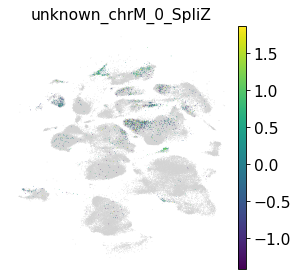

In [110]:
sc.pl.umap(adata_splicing,color="unknown_chrM_0_SpliZ")

In [111]:
adata_splicing = remove_cats(adata_splicing)
adata_splicing.obs = adata_splicing.obs[['tissue', 'subtissue', 'method', 'donor', 'anatomical_position', 'n_counts', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex']]
adata_splicing.obs['anatomical_position'] = adata_splicing.obs['anatomical_position'].fillna(adata_splicing.obs['subtissue'])
adata_splicing.obs = adata_splicing.obs.drop("subtissue",axis =1)
adata_splicing.obs.columns = [
    "organ_tissue", "method","donor","anatomical_information", 
    "n_counts_UMIs", "n_genes",
    "cell_ontology_class", "free_annotation",
       "manually_annotated", "compartment", "gender"   
]
adata_splicing.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TS_Splicing.h5ad")


... storing 'organ_tissue' as categorical
... storing 'method' as categorical
... storing 'donor' as categorical
... storing 'anatomical_information' as categorical
... storing 'cell_ontology_class' as categorical
... storing 'free_annotation' as categorical
... storing 'compartment' as categorical
... storing 'gender' as categorical


## make objects for hosting + UMAPs

In [112]:
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'cell_identifier', 'decontX_split', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred', 'knn_on_scanorama_pred', 'Annotation', '_labels_annotation', 'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id', 'onclass_pred', 'rf_pred', '_batch_annotation', 'knn_on_scvi_offline_pred', 'consensus_percentage', 'consensus_prediction', 'Manually Annotated', '_ref_subsample', 'score_epithelial', 'score_endothelial', 'score_stromal', 'score_immune', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex'
    var: 'gene_symbol', 'feature_t

In [113]:
adata_hosting = adata.copy()
adata_hosting.obs = adata_hosting.obs[['tissue', 'subtissue', 'method', 'donor', 'anatomical_position', 'n_counts', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex']]

In [114]:
adata_hosting.obs.head()

tissue subtissue method donor  \
cell_id                                                                
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1  Liver       nan    10X  TSP6   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1  Liver       nan    10X  TSP6   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1  Liver       nan    10X  TSP6   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1  Liver       nan    10X  TSP6   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1  Liver       nan    10X  TSP6   

                                       anatomical_position  n_counts  n_genes  \
cell_id                                                                         
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                 nan    7633.0     2259   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                 nan    2858.0     1152   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1                 nan    7787.0     2983   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                 nan   10395.0     2598   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                 nan    6610.0     2125   

                                                         cell_ontology_class  \
cell_id                                                                        
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                            macrophage   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                              monocyte   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1  endothelial cell of hepatic sinusoid   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                            macrophage   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                  liver dendritic cell   

                                            free_annotation  \
cell_id                                                       
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1  Monocyte/Macrophage   
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1             Monocyte   
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1          Endothelial   
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1  Monocyte/Macrophage   
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1       Dendritic cell   

                                        manually_annotated  compartment   sex  
cell_id                                                                        
AAACCCACACTCCTGT_TSP6_Liver_NA_10X_1_1                True       immune  male  
AAACGAAGTACCAGAG_TSP6_Liver_NA_10X_1_1                True       immune  male  
AAACGCTCAACGGCTC_TSP6_Liver_NA_10X_1_1                True  endothelial  male  
AAAGAACAGCCTCTTC_TSP6_Liver_NA_10X_1_1                True       immune  male  
AAAGAACGTAGCACAG_TSP6_Liver_NA_10X_1_1                True       immune  male

In [115]:
adata_hosting.obs['anatomical_position'] = adata_hosting.obs['anatomical_position'].fillna(adata_hosting.obs['subtissue'])
adata_hosting.obs = adata_hosting.obs.drop("subtissue",axis =1)

Donor: Set of donors available in the dataset. For details see the donor characteristics summary.
Organ: List of organs available in Tabula Sapiens.
Anatomical Information: If available, more specific information of where in the organ the cells were collected is provided.
Annotation: Cell type annotations using the Cell Ontology.
Compartment: Functional compartment for each cell type.
Manually Annotated: True or False, whether or not the corresponding value in Annotation has been manually verified by a tissue expert.
Predictability: Measure of how often the automatic annotation algorithms agree with the manual annotations, or with each other when manual annotations are not present.
Method: smartseq2 (full-length) or 10X (3prime)
The following numeric layers are available:
Raw counts: raw, not normalized counts.
Counts: decontX and normalized counts. Same as in .X slot at the time of download.

In [116]:
adata_hosting

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: 'tissue', 'method', 'donor', 'anatomical_position', 'n_counts', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'tissue_colors', 'umap', 'compartment_colors', 'sex_colors'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [117]:
adata_hosting.obs.columns = [
    "organ_tissue", "method","donor","anatomical_information", 
    "n_counts_UMIs", "n_genes",
    "cell_ontology_class", "free_annotation",
       "manually_annotated", "compartment", "gender"   
]

In [ ]:
donor : Set of donors available in the dataset. For details see the donor characteristics summary.
organ_tissue : List of organs available in Tabula Sapiens.
anatomical_information : If available, more specific information of where in the organ the cells were collected is provided.
gender : donor gender. For details see the donor characteristics summary.
cell_ontology_class : Cell type annotations using the Cell Ontology.
free_annotation : Cell type annotations using free text.
compartment : Functional compartment for each cell type.
manually_annotated : True or False, whether or not the corresponding value in Annotation has been manually verified by a tissue expert.
n_counts_UMIs : number of counts (smartseq2) or UMIs (10x) per cell.
n_genes : number of genes per cell.
method : smartseq2 (full-length) or 10X (3prime)
The following numeric layers are available:
.layers["raw_counts"] : raw, not normalized counts.
.layers["decontXcounts"] : decontX counts.
.raw.X : normalized decontX counts.
.X : normalized and scaled decontX counts.

In [148]:
adata_hosting

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: 'organ_tissue', 'method', 'donor', 'anatomical_information', 'n_counts_UMIs', 'n_genes', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'gender'
    var: 'gene_symbol', 'feature_type', 'ensemblid', 'highly_variable', 'means', 'dispersions', 'dispersions_norm', 'mean', 'std'
    uns: '_scvi', '_training_mode', 'dendrogram_cell_type_tissue', 'dendrogram_computational_compartment_assignment', 'dendrogram_consensus_prediction', 'dendrogram_tissue_cell_type', 'donor_colors', 'donor_method_colors', 'hvg', 'method_colors', 'neighbors', 'tissue_colors', 'umap', 'compartment_colors', 'sex_colors', 'organ_tissue_colors'
    obsm: 'X_pca', 'X_scvi', 'X_scvi_umap', 'X_umap'
    layers: 'decontXcounts', 'raw_counts'
    obsp: 'connectivities', 'distances'

In [149]:
adata_hosting.uns['donor_colors'] = list(donors_color_dict.values())
adata_hosting.uns['method_colors'] = list(methods_color_dict.values())
adata_hosting.uns['compartment_colors'] = list(compartments_color_dict.values())
adata_hosting.uns['organ_tissue_colors'] = list(tissues_color_dict.values())

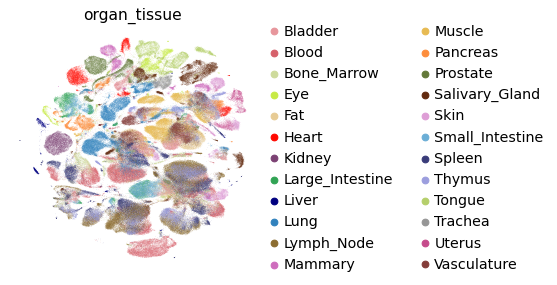

In [150]:
adata_hosting.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TabulaSapiens.h5ad")
sc.pl.umap(adata_hosting,color=["organ_tissue"],save = "_uploads_TabulaSapiens.png")


epithelial


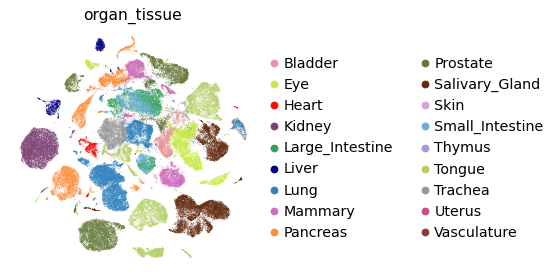

germ line


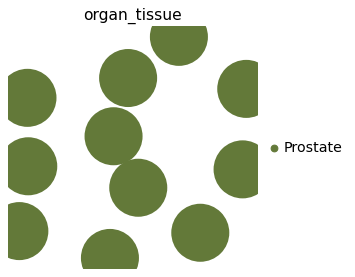

endothelial


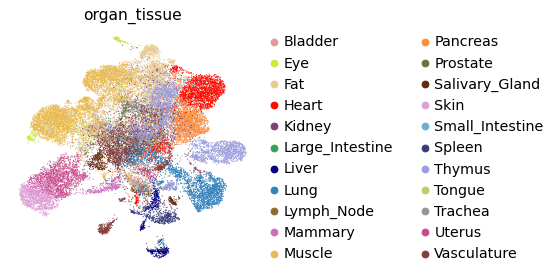

immune


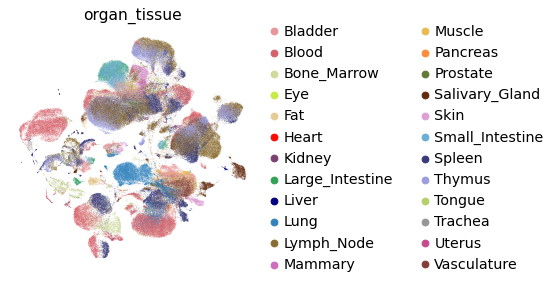

stromal


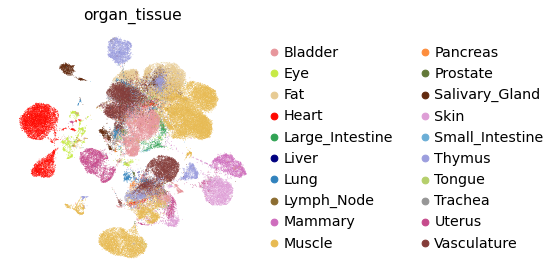

In [153]:
for c in set(adata_hosting.obs["compartment"]):
    print(c)
    comp = adata_hosting[adata_hosting.obs["compartment"]==c].copy()
    
    sc.pp.neighbors(comp, use_rep="X_scvi")
    sc.tl.umap(comp)
    sc.pl.umap(comp,color=["organ_tissue"],save = "_uploads_"+c+".png")
    comp.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TS_"+c+".h5ad")
    


Small_Intestine


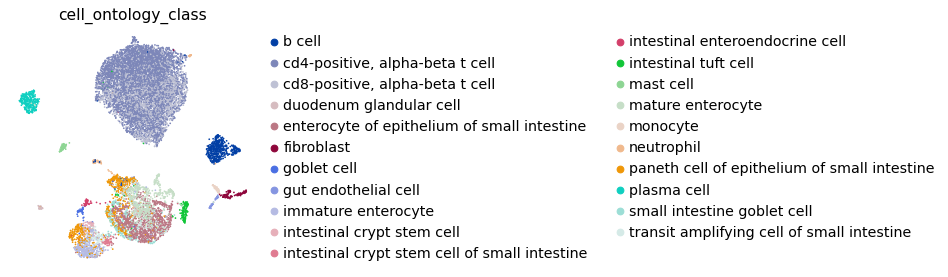

Eye


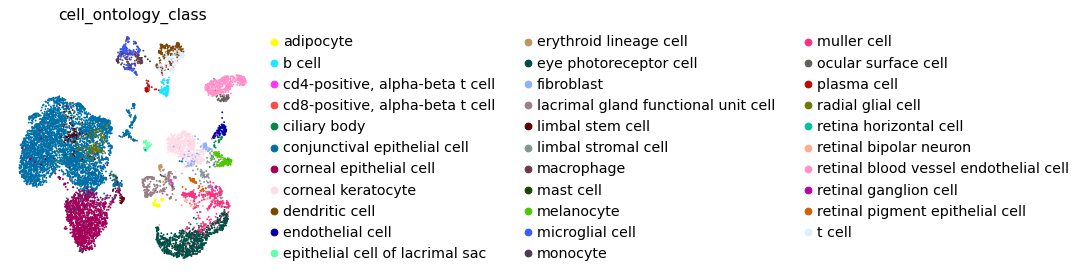

Large_Intestine


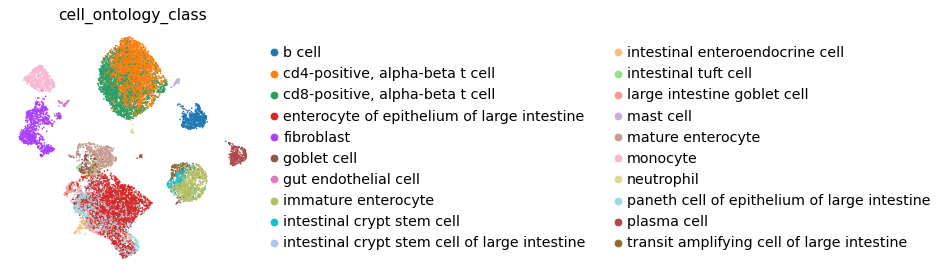

Uterus


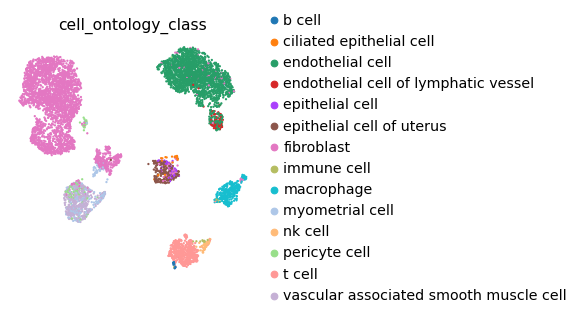

Fat


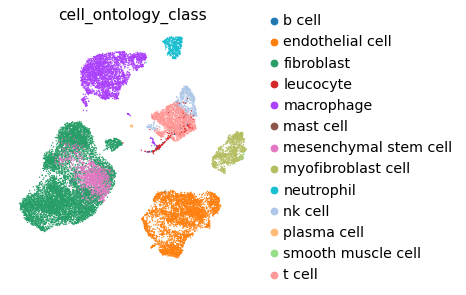

Heart


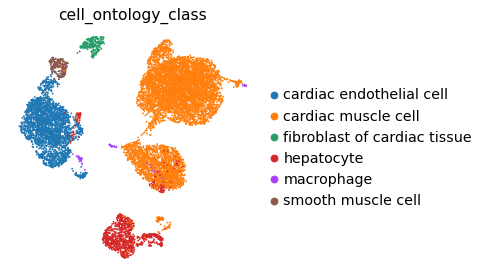

Trachea


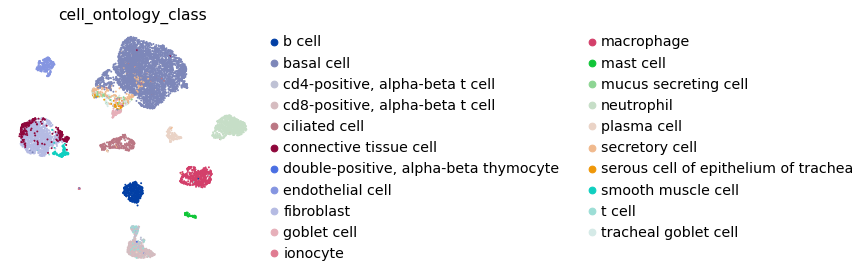

Vasculature


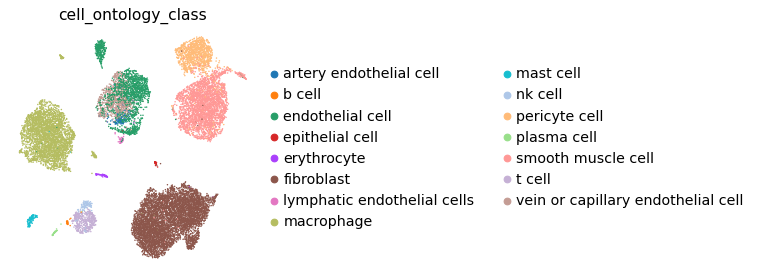

Pancreas


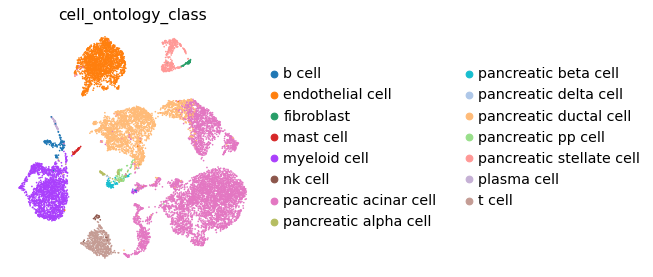

Thymus


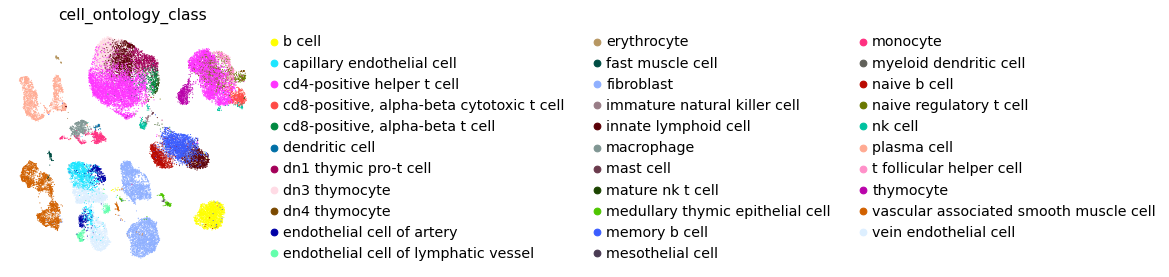

Muscle


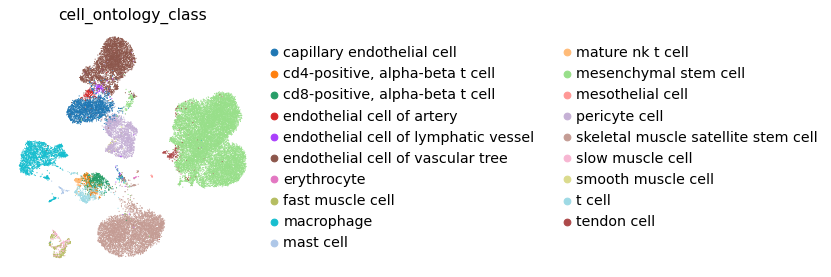

Salivary_Gland


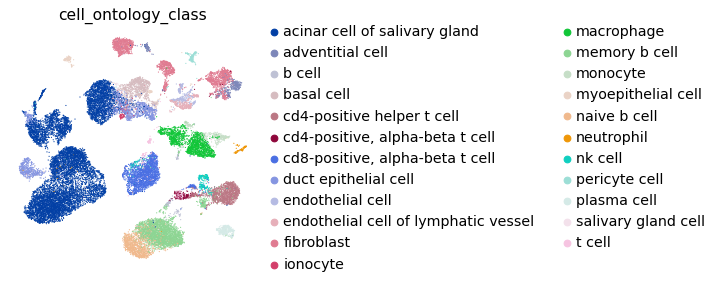

Prostate


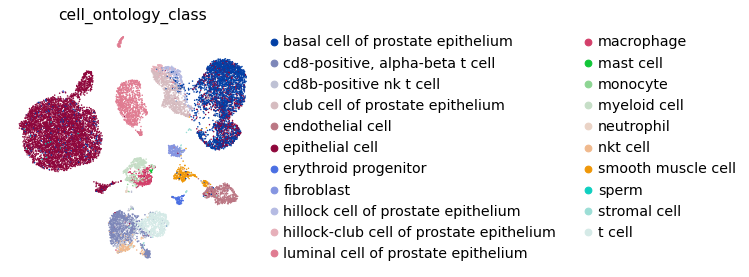

Mammary


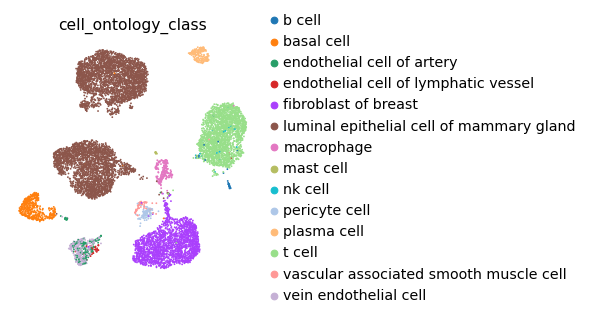

Tongue


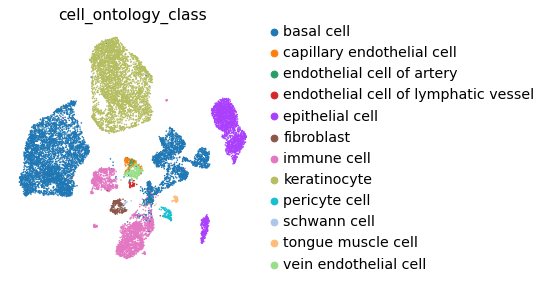

Liver


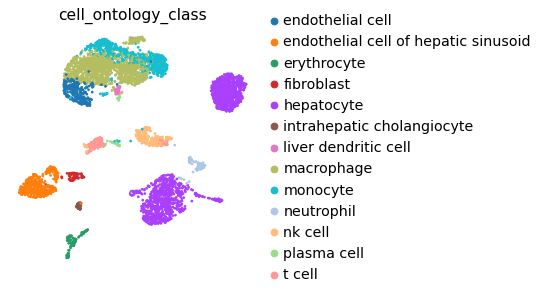

Bladder


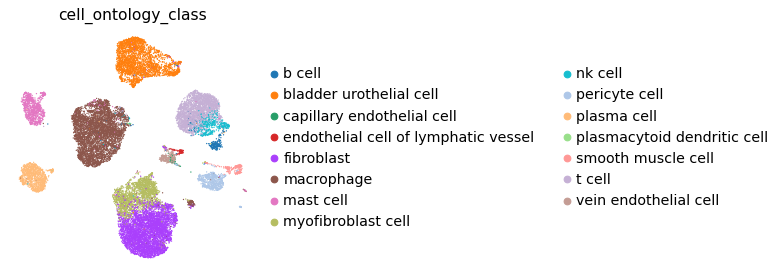

Lymph_Node


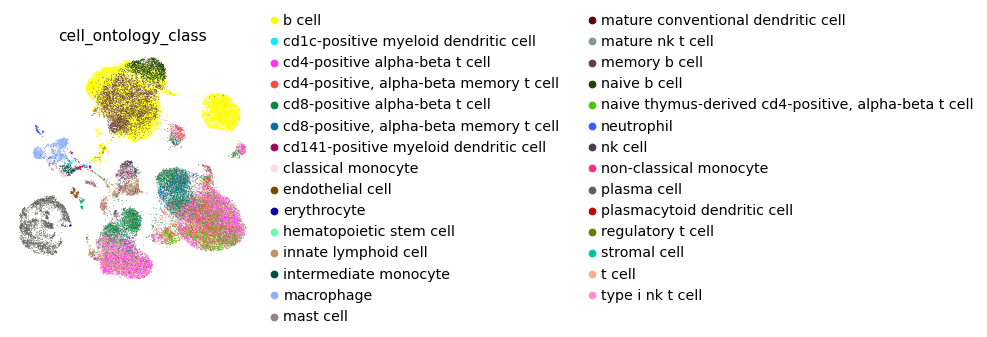

Skin


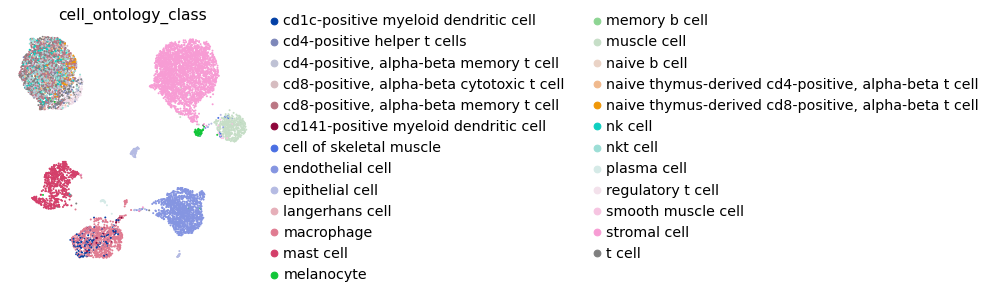

Blood


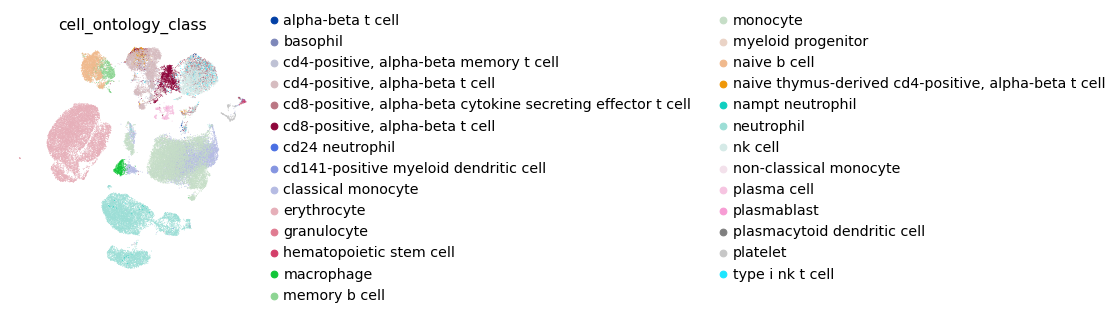

Spleen


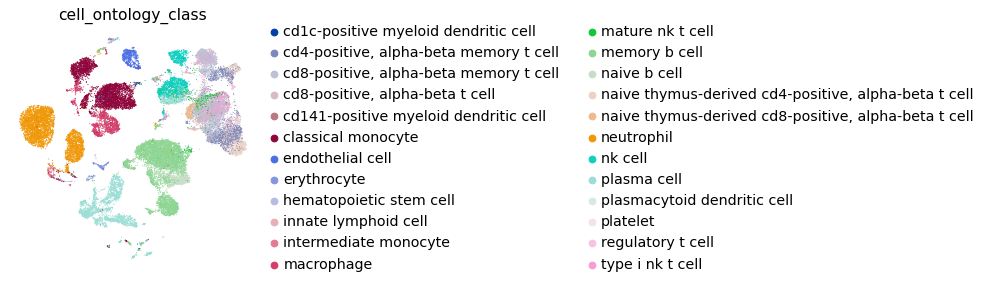

Kidney


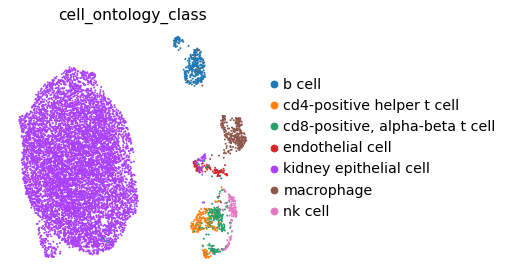

Lung


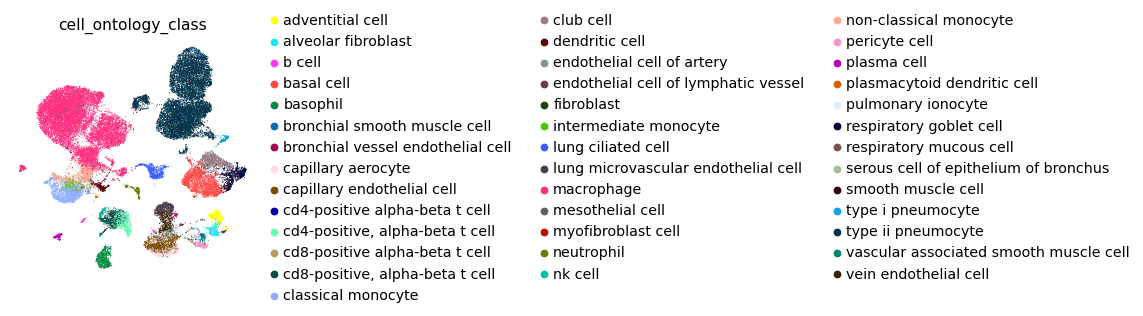

Bone_Marrow


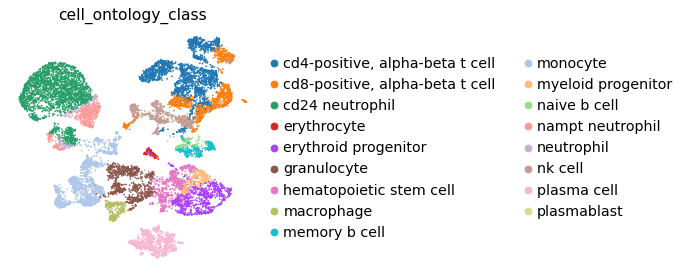

In [152]:
for t in set(adata_hosting.obs["organ_tissue"]):
    print(t)
    tiss = adata_hosting[adata_hosting.obs["organ_tissue"]==t].copy()
    
    sc.pp.neighbors(tiss, use_rep="X_scvi")
    sc.tl.umap(tiss)
    sc.pl.umap(tiss,color=["cell_ontology_class"],save = "_uploads_"+t+".png")
#     tiss.write("/mnt/ibm_lg/angela/sapiens/data/uploads_to_s3/v2_july_2021/TS_"+t+".h5ad")
    


In [140]:
pwd

'/data/angela/sapiens/tabula-sapiens/analysis-scripts/publication/v0'

In [121]:
adata

AnnData object with n_obs × n_vars = 481120 × 58870
    obs: '10X_run', 'pilot', 'tissue', 'subtissue', 'method', '10X_sample', '10X_replicate', 'notes', 'seqrun', 'donor', 'anatomical_position', '10X_barcode', 'cDNAplate', 'libraryplate', 'well', 'donor_method', 'cell_identifier', 'decontX_split', 'n_counts', 'n_genes', '_scvi_batch', '_scvi_labels', '_scvi_local_l_mean', '_scvi_local_l_var', '_dataset', 'knn_on_bbknn_pred', 'knn_on_scanorama_pred', 'Annotation', '_labels_annotation', 'scanvi_offline_pred', 'svm_pred', 'final_annotation_cell_ontology_id', 'onclass_pred', 'rf_pred', '_batch_annotation', 'knn_on_scvi_offline_pred', 'consensus_percentage', 'consensus_prediction', 'Manually Annotated', '_ref_subsample', 'score_epithelial', 'score_endothelial', 'score_stromal', 'score_immune', 'computational_compartment_assignment', 'tissue_cell_type', 'cell_type_tissue', 'cell_ontology_class', 'free_annotation', 'manually_annotated', 'compartment', 'sex'
    var: 'gene_symbol', 'feature_t

In [124]:
adata = remove_cats(adata)

In [129]:
count_cell_types = 0
for t in set(adata.obs['tissue']):
    tiss = adata[adata.obs["tissue"]==t].copy()
    tiss = remove_cats(tiss)
    count_cell_types = count_cell_types + len(set(tiss.obs["free_annotation"]))
count_cell_types

521

In [136]:
set(adata.obs["free_annotation"].astype(str) + "_" + adata.obs["tissue"].astype(str))

{'AREG High T-Cell_Prostate',
 'AREG Low T-Cell_Prostate',
 'Adventitial Fibroblast_Salivary_Gland',
 'Adventitial fibroblast_Salivary_Gland',
 'Artery cells (Endothelial Cells)_Mammary',
 'B cell_Lymph_Node',
 'B cell_Pancreas',
 'B cell_Salivary_Gland',
 'B cell_Trachea',
 'B cells_Eye',
 'B cells_Mammary',
 'B cells_Thymus',
 'B lymphocytes_Uterus',
 'BECS_Liver',
 'B_Cells_Fat',
 'Basal Epithelial Cell_Prostate',
 'Basal cell_Salivary_Gland',
 'Basal_Salivary_Gland',
 'Bronchial vessel endothelial cell_Lung',
 'CD141-positive myeloid dendritic cell_Lymph_Node',
 'CD1c-positive myeloid dendritic cell_Lymph_Node',
 'CD24 Neutrophil_Blood',
 'CD24 Neutrophil_Bone_Marrow',
 'CD4 Helper T cell_Salivary_Gland',
 'CD4 T cell-low RNA_Salivary_Gland',
 'CD4 T cell_Salivary_Gland',
 'CD4 helper T cell-like_Thymus',
 'CD4 t cell_Blood',
 'CD4 t cell_Bone_Marrow',
 'CD4-positive alpha-beta thymocyte_Lymph_Node',
 'CD4-positive helper T cells_Skin',
 'CD4-positive memory T cell_Skin',
 'CD8 T c

In [127]:
len(set(adata.obs["cell_ontology_class"]))

180

In [125]:
len(set(adata.obs["tissue_cell_type"]))

867